In [1]:
from __future__ import division
#from sympy import *
import numpy as np
from numpy.linalg import *
import time
import matplotlib.pyplot as plt
%matplotlib inline

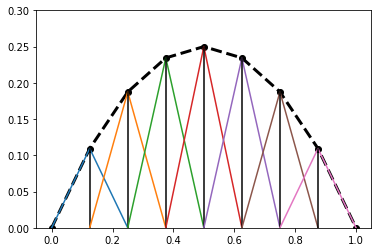

In [2]:
def plot_basis(xVec, yVec, filename, plot_surplus=True, plot_interpolation=True, plot_points=True, color=None, figsize=None, hierarchical=False, tickz=False, boundaries=True):
    #first plot the training data
    if figsize is not None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = plt.subplots()

    if plot_points:
        plt.scatter(xVec,yVec, label="data", color="black")
    #the resulting function will just be the linear interpolation of the extended points
    if plot_interpolation:
        plt.plot(xVec,yVec,color="black",label="linear interpolation",linewidth=3,linestyle='--')
    #calculate the hat functions from before but now scale them with the height v_i
    if hierarchical:
        stride = 2
    else:
        stride = 1
    for i in range(1, len(xVec)-1, stride):
        if i == 1:
            x_1 = 0
        else:
            x_1 = xVec[i-1]
        if i == len(xVec)-2:
            x_3 = 1
        else:
            x_3 = xVec[i+1]
        xHat = [x_1,xVec[i],x_3]
        yHat = [0,yVec[i],0]
        if color is not None:
            plt.plot(xHat,yHat,color=color)
        else:
            plt.plot(xHat,yHat)
        if plot_surplus:
            plt.plot([xVec[i],xVec[i]],[0,yVec[i]], color="black")
    if hierarchical:
        if len(xVec) == 3:
            begin = 0
            end = 1
        else:
            boundaries = False
    else:
        begin = xVec[-2]
        end = xVec[1]
    if boundaries:
        if color is not None:
            plt.plot([0,end],[yVec[0],0],'--',color=color)
            plt.plot([begin,1],[0,yVec[-1]],'--',color=color)
        else:
            plt.plot([0,end],[yVec[0],0],'--')
            plt.plot([begin,1],[0,yVec[-1]],'--')
    
    plt.ylim([0, max(yVec)*1.2])
    if not tickz:
        ax.set_xticks([],[])
        ax.set_yticks([],[])
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
xVec = np.linspace(0,1,9)

yVec = [x * (1-x) for x in xVec]
plot_basis(xVec, yVec, "nodal1D.pdf", tickz=True, boundaries=False)

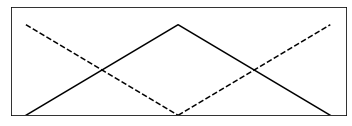

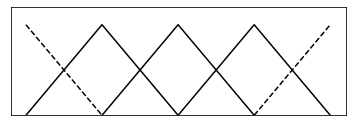

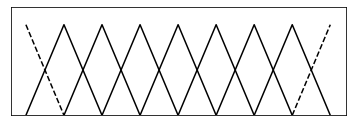

In [3]:
for l in range(1,4):
    xVec = np.linspace(0,1,2**l+1)
    yVec = np.ones(len(xVec))
    plot_basis(xVec,yVec, "nodal_basis_level_" + str(l) + ".pdf", plot_surplus=False, plot_interpolation=False, plot_points=False, color="black", figsize=(6,2))


# Hierarchische Basis

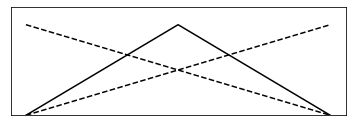

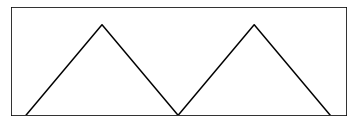

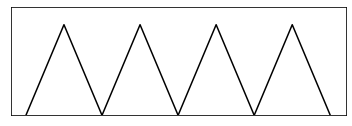

In [4]:
for l in range(1,4):
    xVec = np.linspace(0,1,2**l+1)
    yVec = np.ones(len(xVec))
    plot_basis(xVec,yVec, "hierarchical_basis_level_" + str(l) + ".pdf", plot_surplus=False, plot_interpolation=False, plot_points=False, color="black", figsize=(6,2), hierarchical=True)


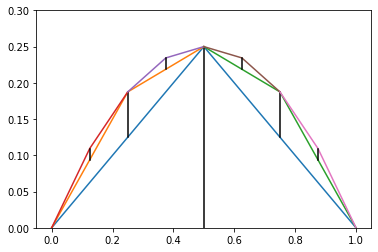

In [5]:
from math import log2
#plt.plot(xVecExtended,yVecExtended,color="black",label="linear interpolation",linewidth=3,linestyle='--')
plt.scatter(xVec,yVec, label="data", color="black")
xVec = np.linspace(0,1,9)[1:-1]

yVec = [x * (1-x) for x in xVec]
numlevel = int(log2(len(xVec)+1))
yVecHier = list(yVec)
for l in range(numlevel):
    for j in range(2**l):
        offset = int(2**(numlevel - l))
        jLevel = offset//2 + j * offset - 1
        if jLevel - offset >= 0:
            leftPoint = xVec[jLevel - offset//2]
        else:
            leftPoint = 0
        if jLevel + offset < len(xVec):
            rightPoint = xVec[jLevel + offset//2]
        else:
            rightPoint = 1
        xHat = [leftPoint, xVec[jLevel], rightPoint]
        #print(jLevel)
        if l != 0:
            leftParent = jLevel - int(2**numlevel/2**(l+1))
            rightParent = jLevel + int(2**numlevel/2**(l+1))
            y = yVec[jLevel]
            yRight=yLeft=0
            if leftParent >= 0:
                y -= 0.5 * yVec[leftParent]
                yLeft = yVec[leftParent]
            if rightParent < len(yVec):
                y -= 0.5 * yVec[rightParent]
                yRight= yVec[rightParent]
            yVecHier[jLevel] = y
            yHat = [yLeft,yVec[jLevel],yRight]

        else:
            y = yVec[jLevel]
            yHat = [0,y,0]
        #print(xHat,yHat)
        plt.plot(xHat,yHat)
        plt.plot([xVec[jLevel],xVec[jLevel]], [yVec[jLevel], yVec[jLevel]-yVecHier[jLevel]], color="black")
        plt.ylim([0, 0.3])
plt.savefig("hierarchical1D.pdf", bbox_inches='tight')

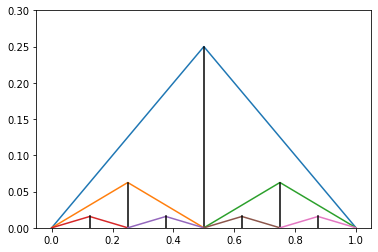

In [6]:
from math import log2
#plt.plot(xVecExtended,yVecExtended,color="black",label="linear interpolation",linewidth=3,linestyle='--')
#plt.scatter(xVec,yVec, label="data", color="black")

numlevel = int(log2(len(xVec)+1))
yVecHier = list(yVec)
for l in range(numlevel):
    for j in range(2**l):
        offset = int(2**(numlevel - l))
        jLevel = offset//2 + j * offset - 1
        if jLevel - offset >= 0:
            leftPoint = xVec[jLevel - offset//2]
        else:
            leftPoint = 0
        if jLevel + offset < len(xVec):
            rightPoint = xVec[jLevel + offset//2]
        else:
            rightPoint = 1
        xHat = [leftPoint, xVec[jLevel], rightPoint]
        #print(jLevel)
        if l != 0:
            leftParent = jLevel - int(2**numlevel/2**(l+1))
            rightParent = jLevel + int(2**numlevel/2**(l+1))
            y = yVec[jLevel]
            yRight=yLeft=0
            if leftParent >= 0:
                y -= 0.5 * yVec[leftParent]
                yLeft = yVec[leftParent]
            if rightParent < len(yVec):
                y -= 0.5 * yVec[rightParent]
                yRight= yVec[rightParent]
            yVecHier[jLevel] = y
            yHat = [0,yVecHier[jLevel],0]

        else:
            y = yVec[jLevel]
            yHat = [0,y,0]
        #print(xHat,yHat)
        plt.plot(xHat,yHat)
        plt.plot([xVec[jLevel],xVec[jLevel]], [0, yVecHier[jLevel]], color="black")
        plt.ylim([0, 0.3])
plt.savefig("hierarchical1Dflat.pdf", bbox_inches='tight')

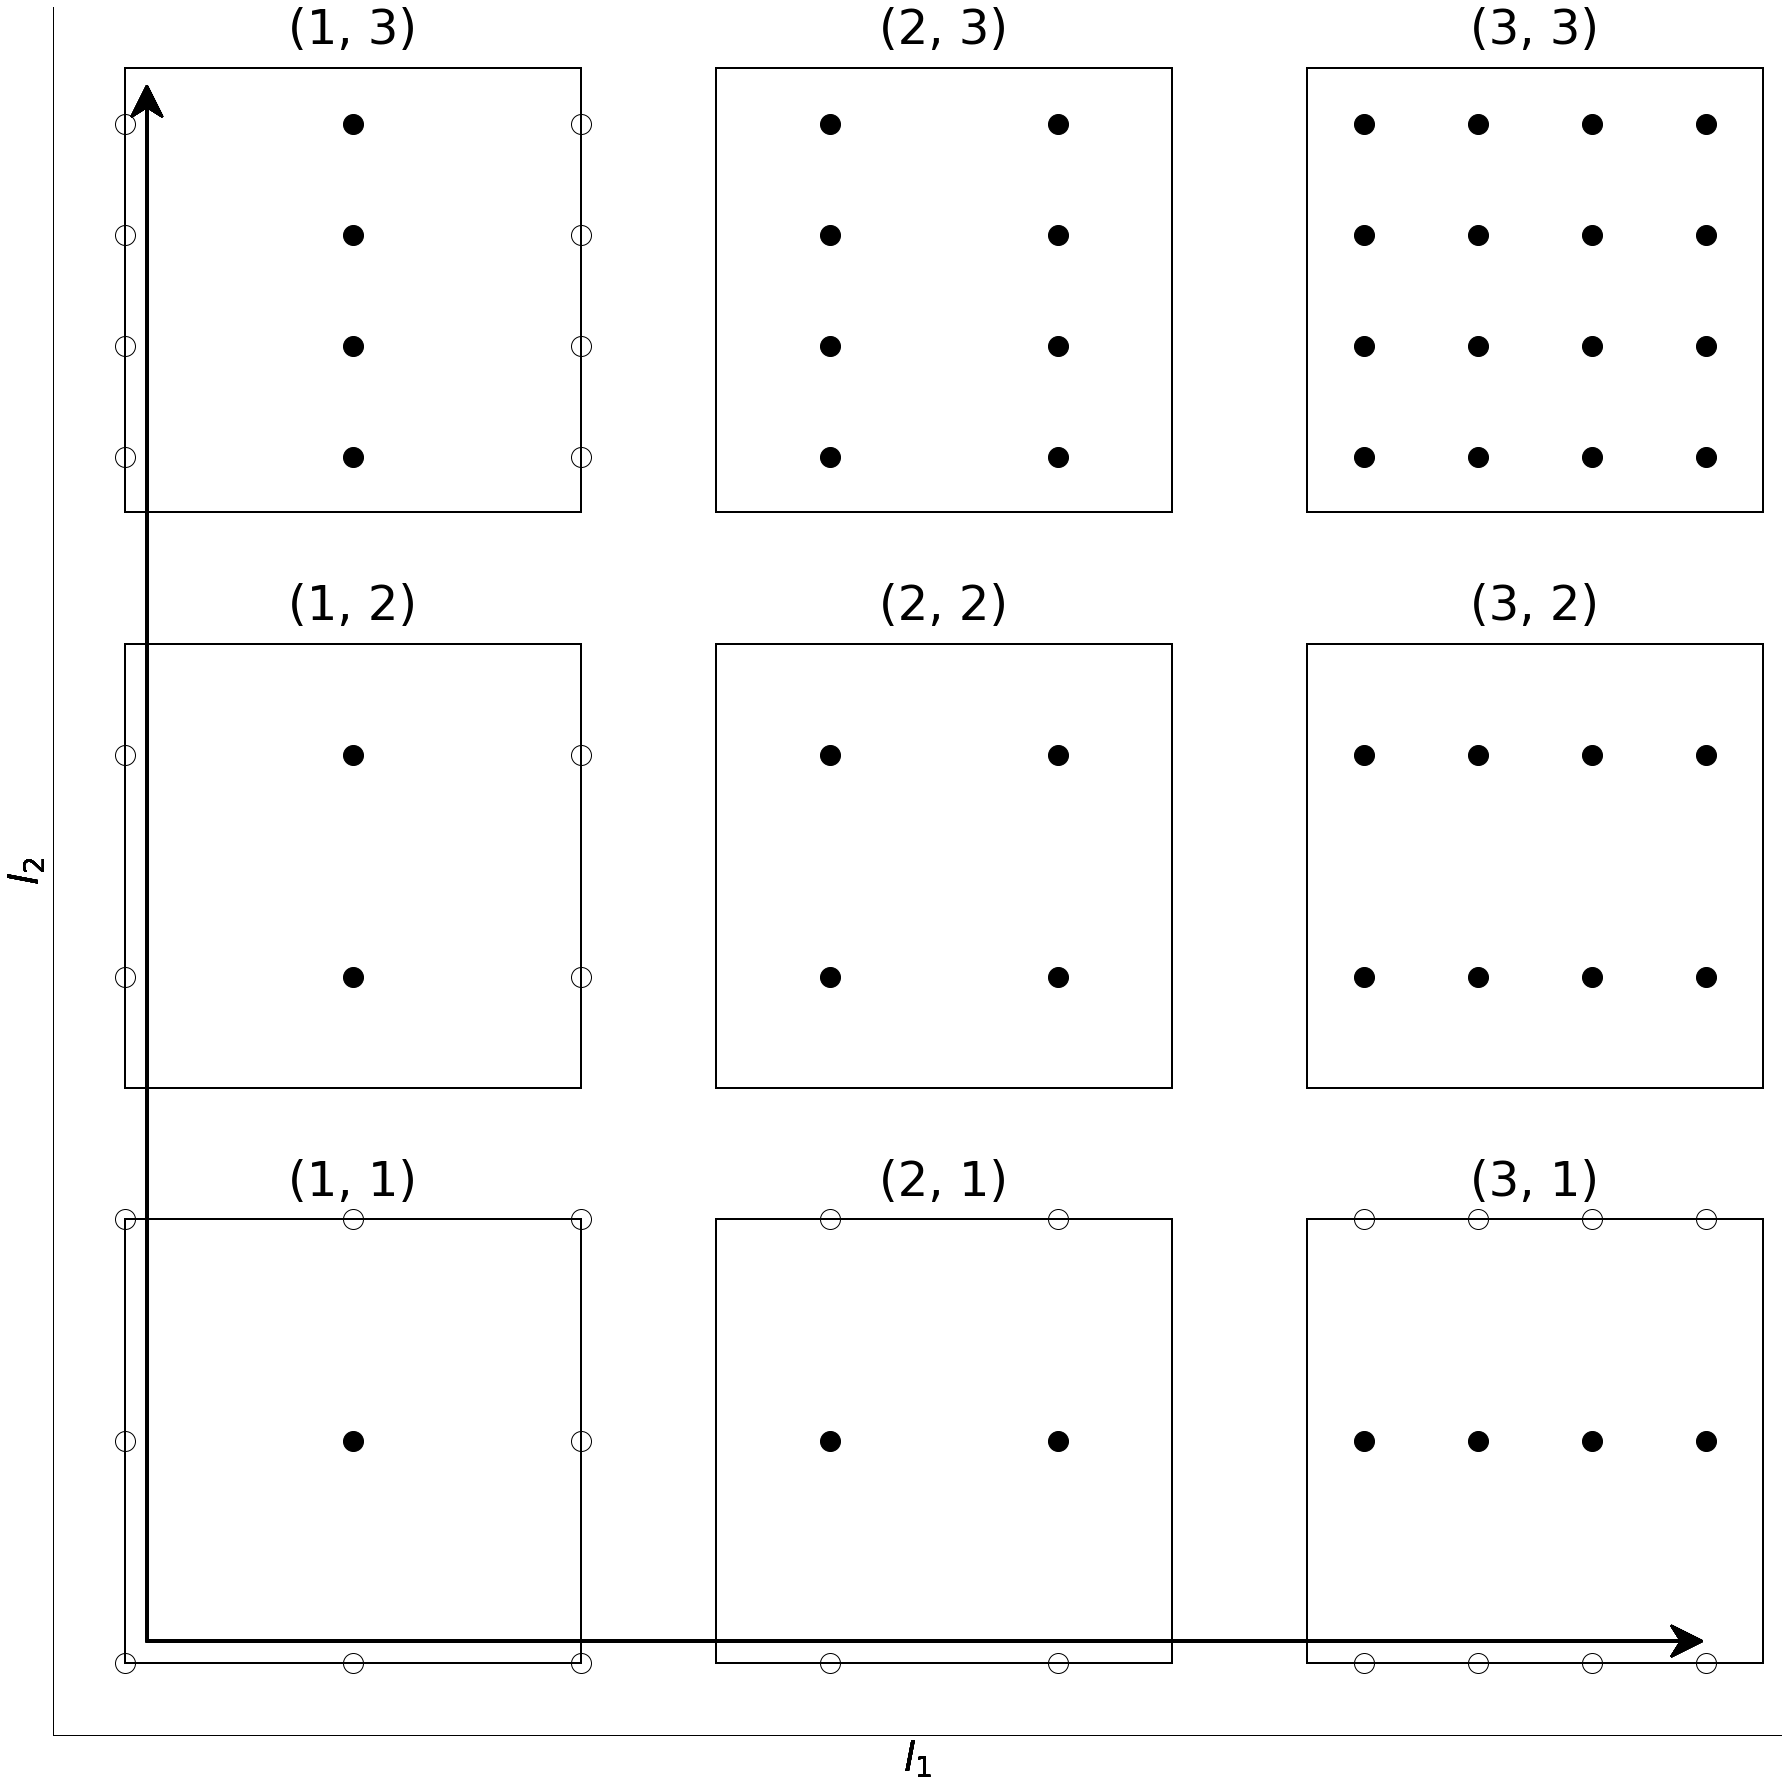

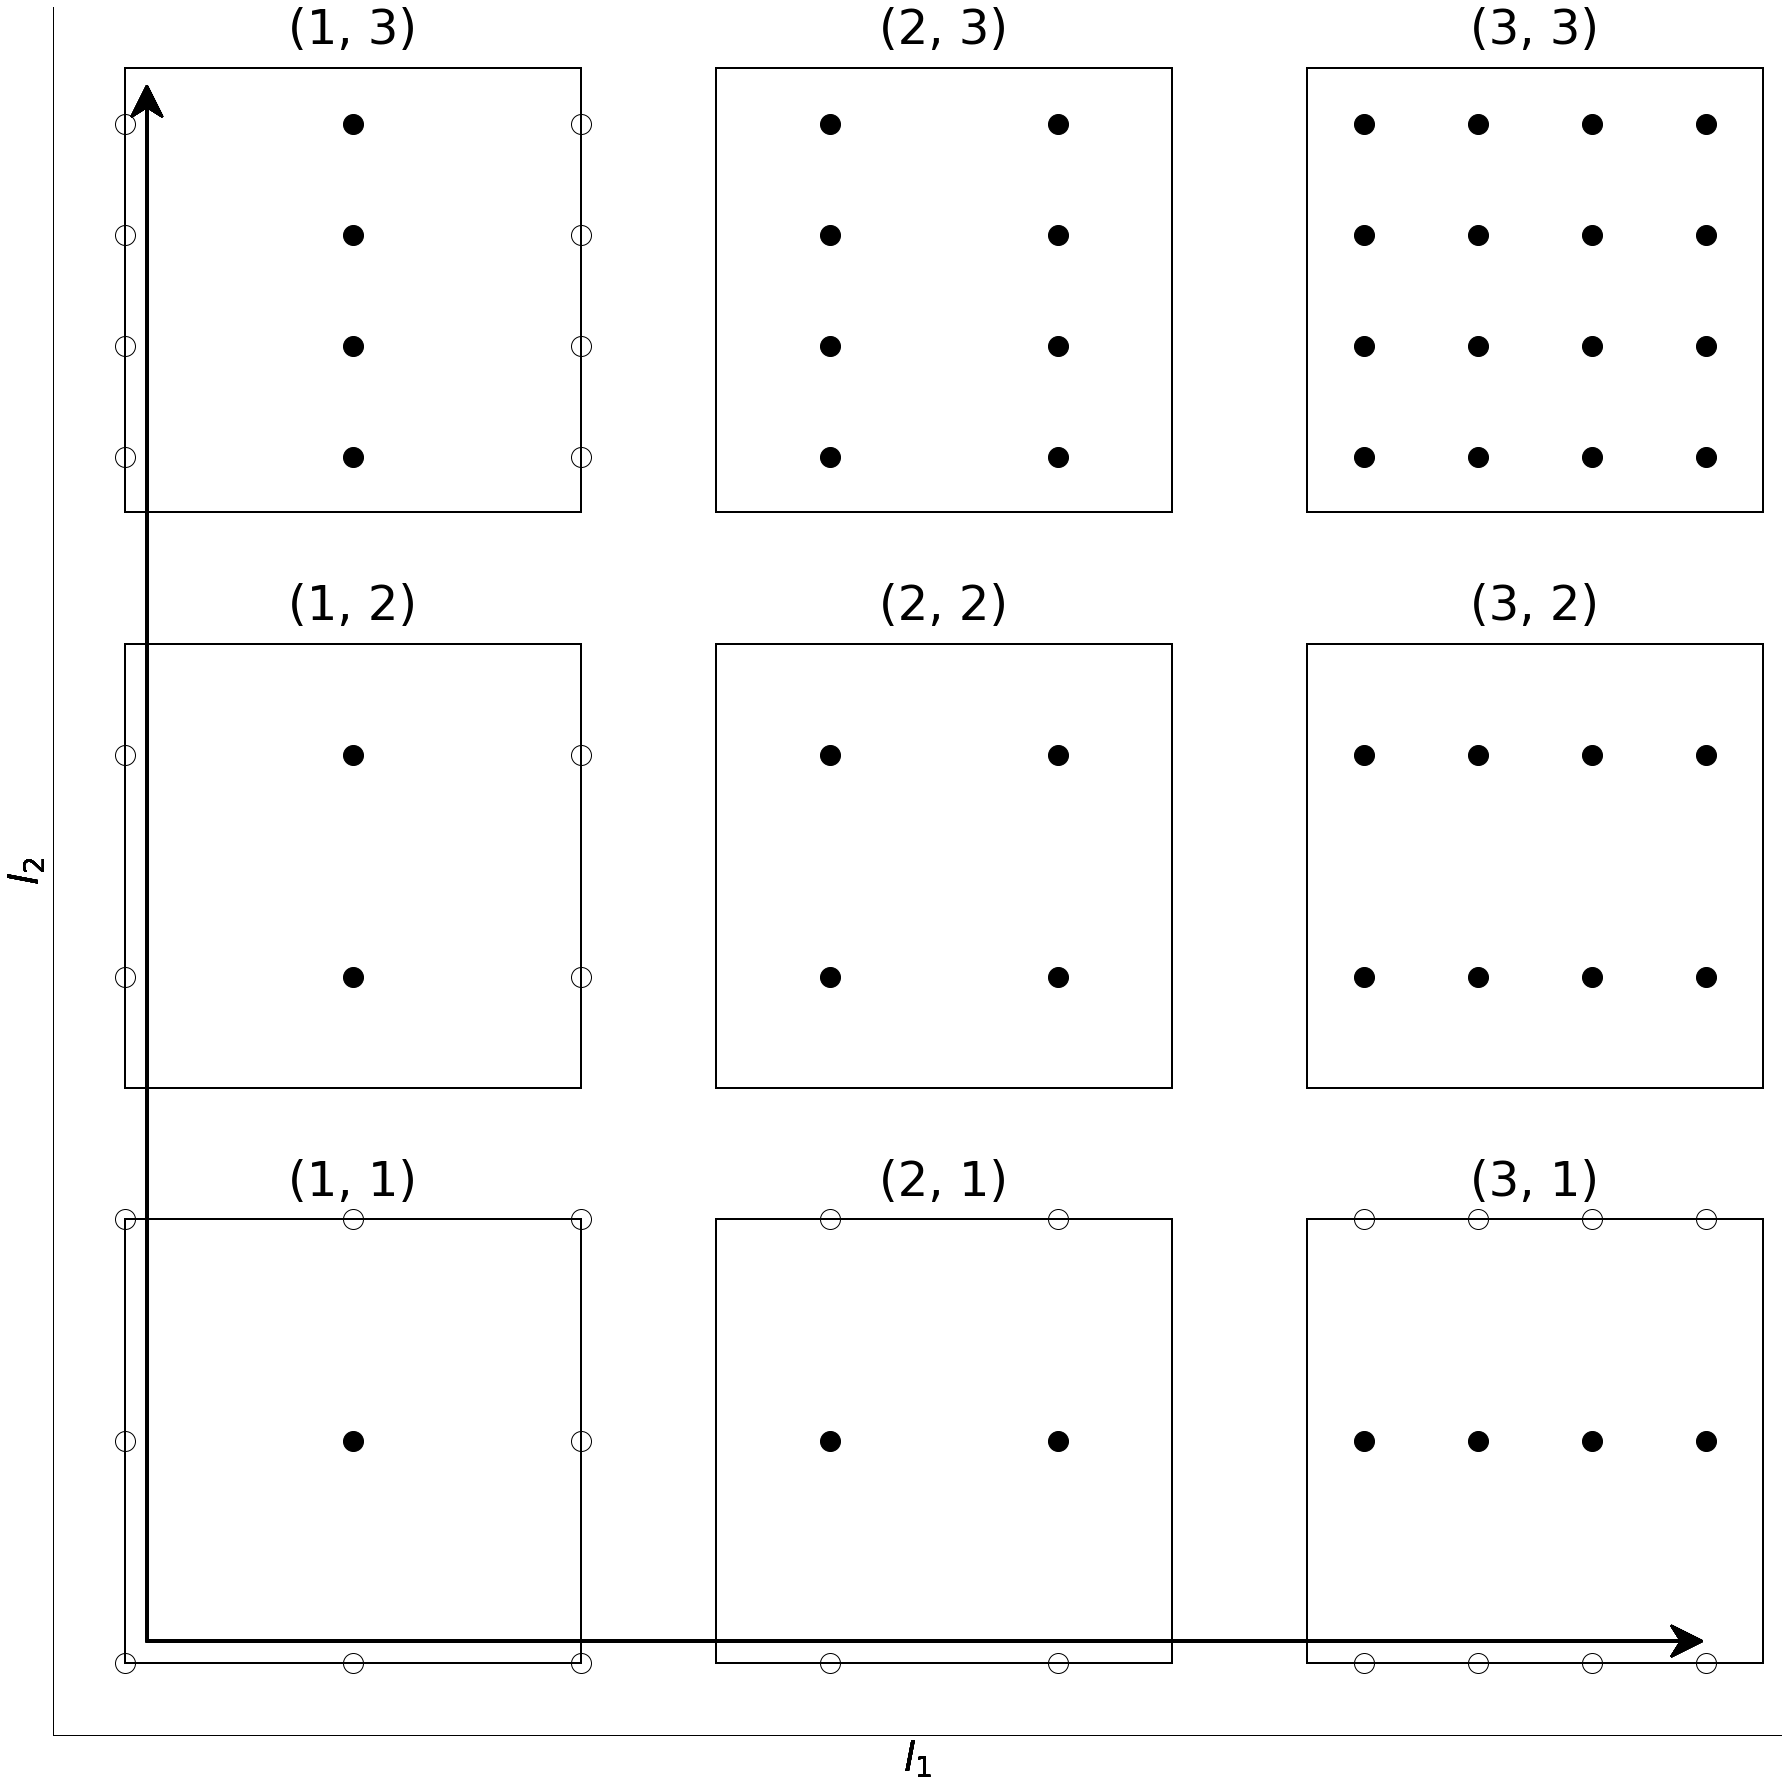

In [7]:
%matplotlib inline
import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.StandardCombi import *
from sparseSpACE.Grid import *
import numpy as np
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)
f = FunctionExpVar()
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 3
combiObject.set_combi_parameters(minimum_level, maximum_level)
combiObject.print_subspaces(sparse_grid_spaces=False, ticks=False, fade_full_grid=False, filename="hierarchical_subspaces.pdf")

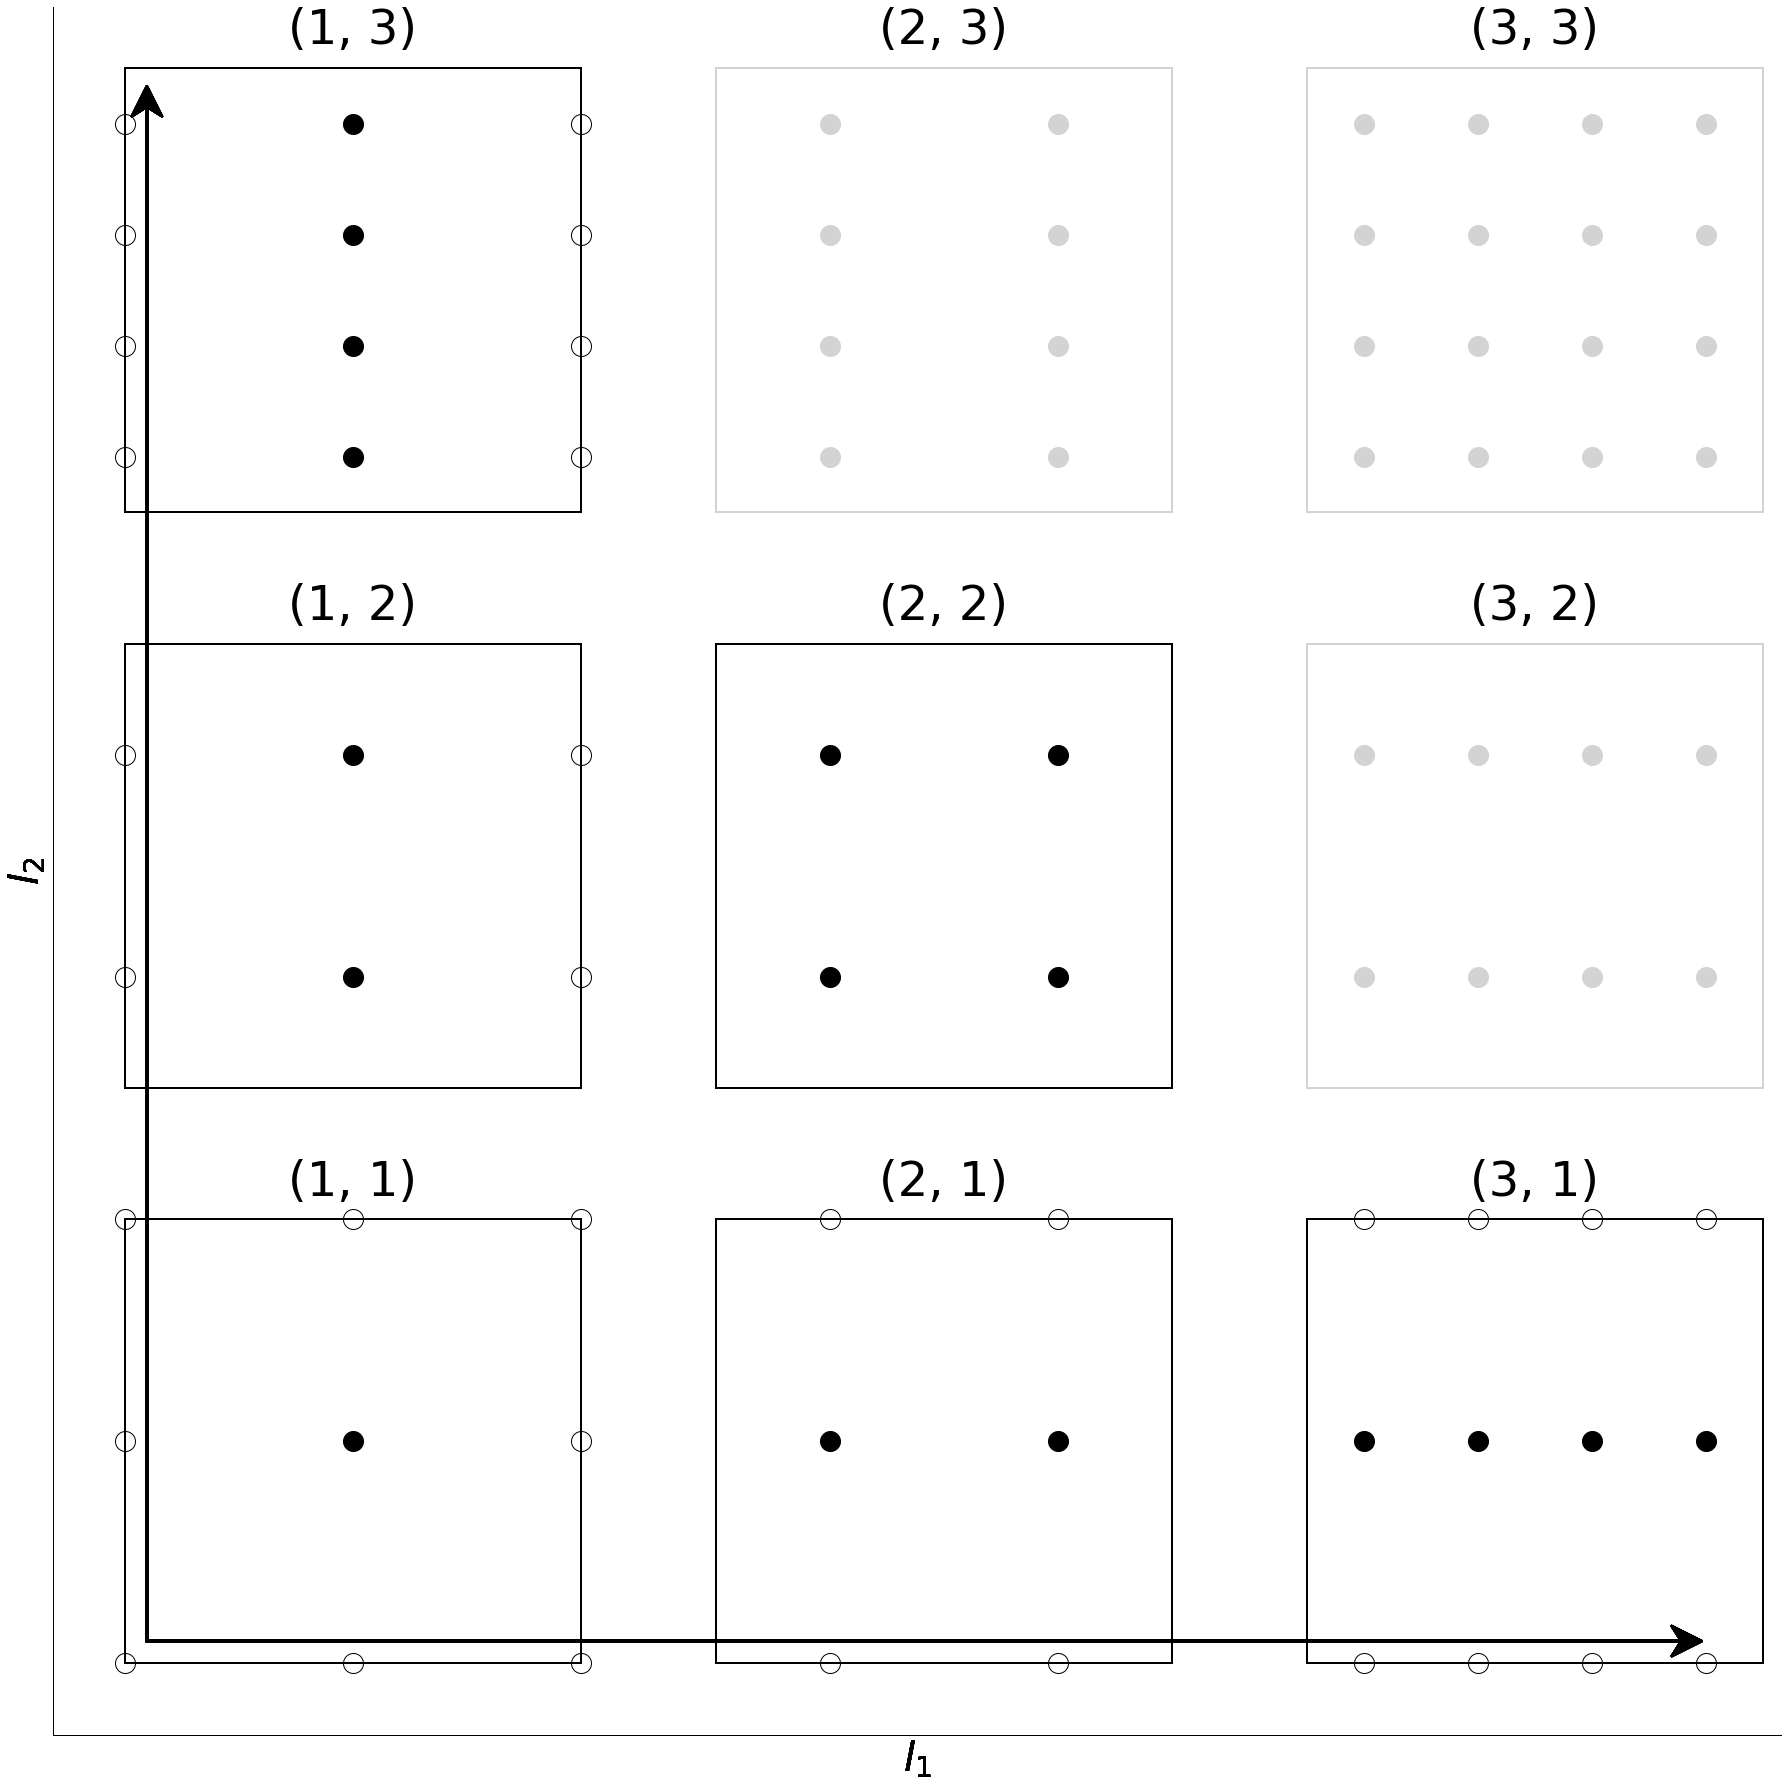

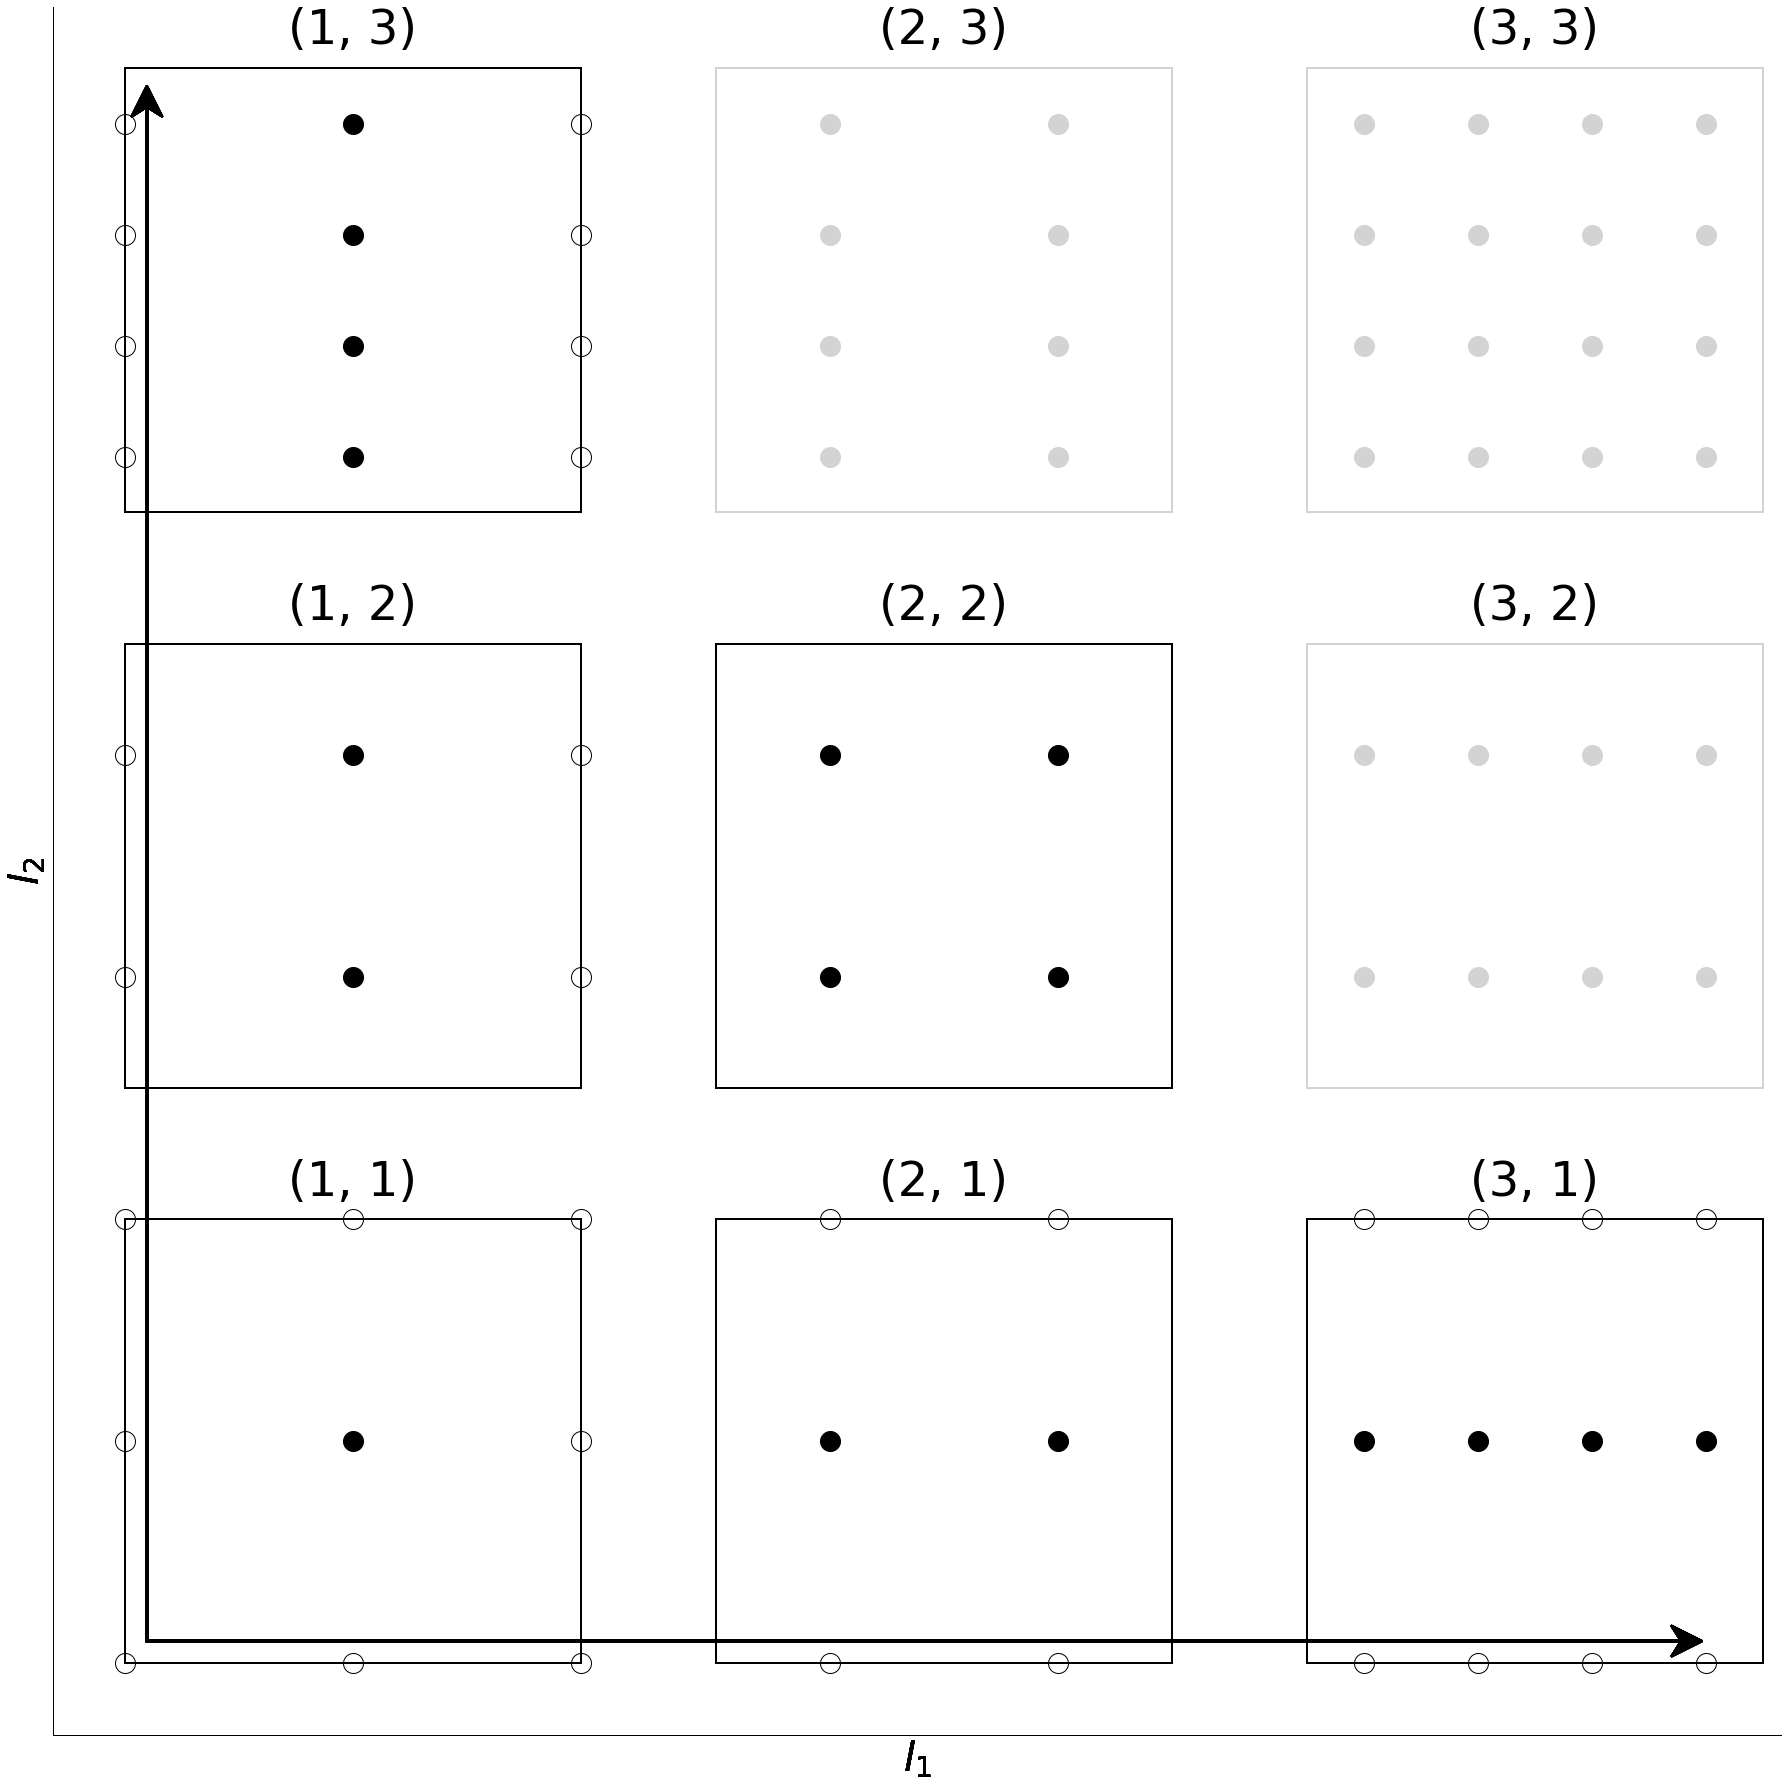

In [8]:
%matplotlib inline
import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.StandardCombi import *
from sparseSpACE.Grid import *
import numpy as np
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)
f = FunctionExpVar()
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 3
combiObject.set_combi_parameters(minimum_level, maximum_level)
combiObject.print_subspaces(sparse_grid_spaces=False, ticks=False, fade_full_grid=True, filename="sparsegrid_subspaces.pdf")

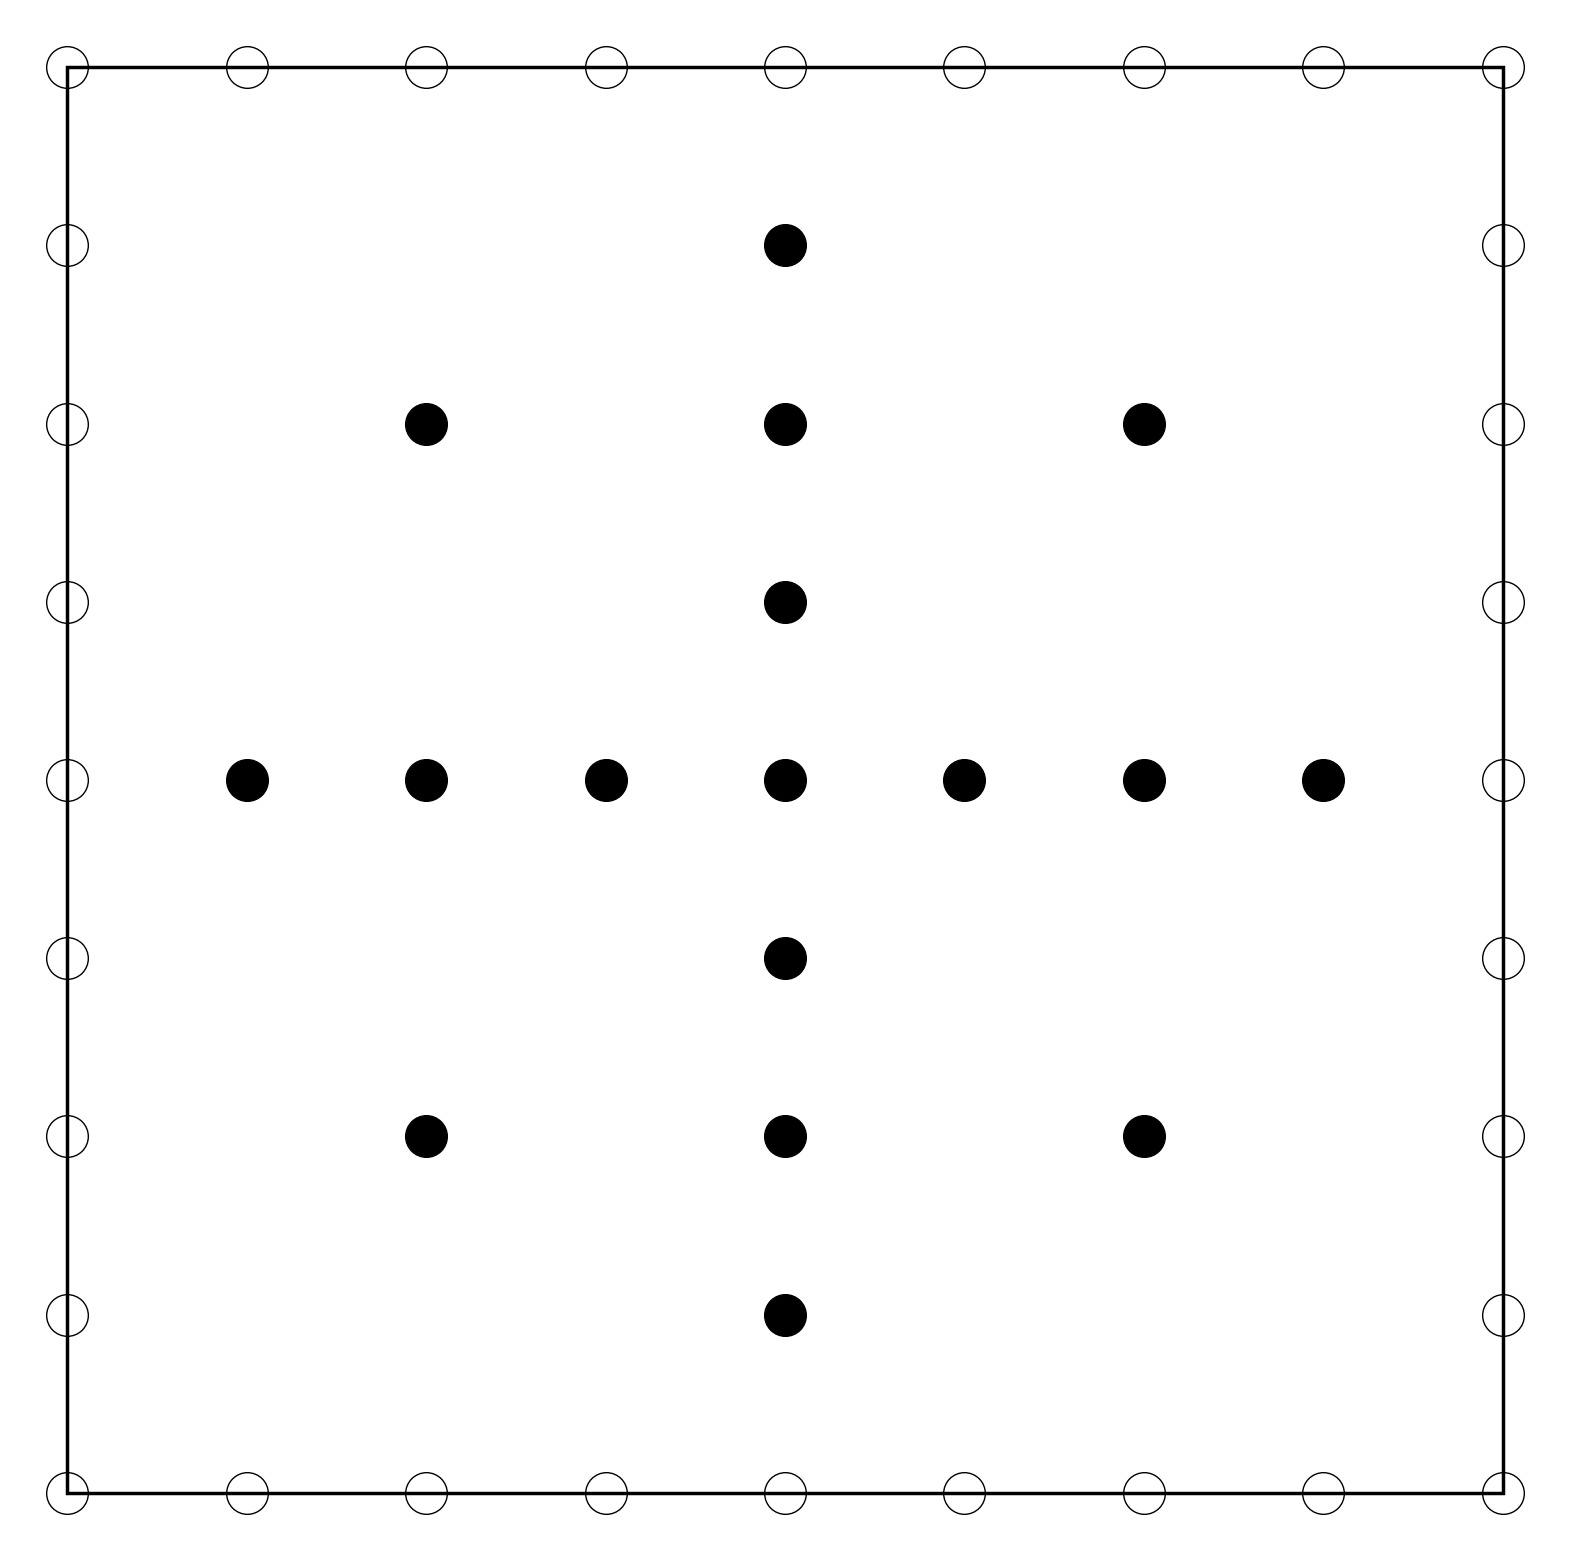

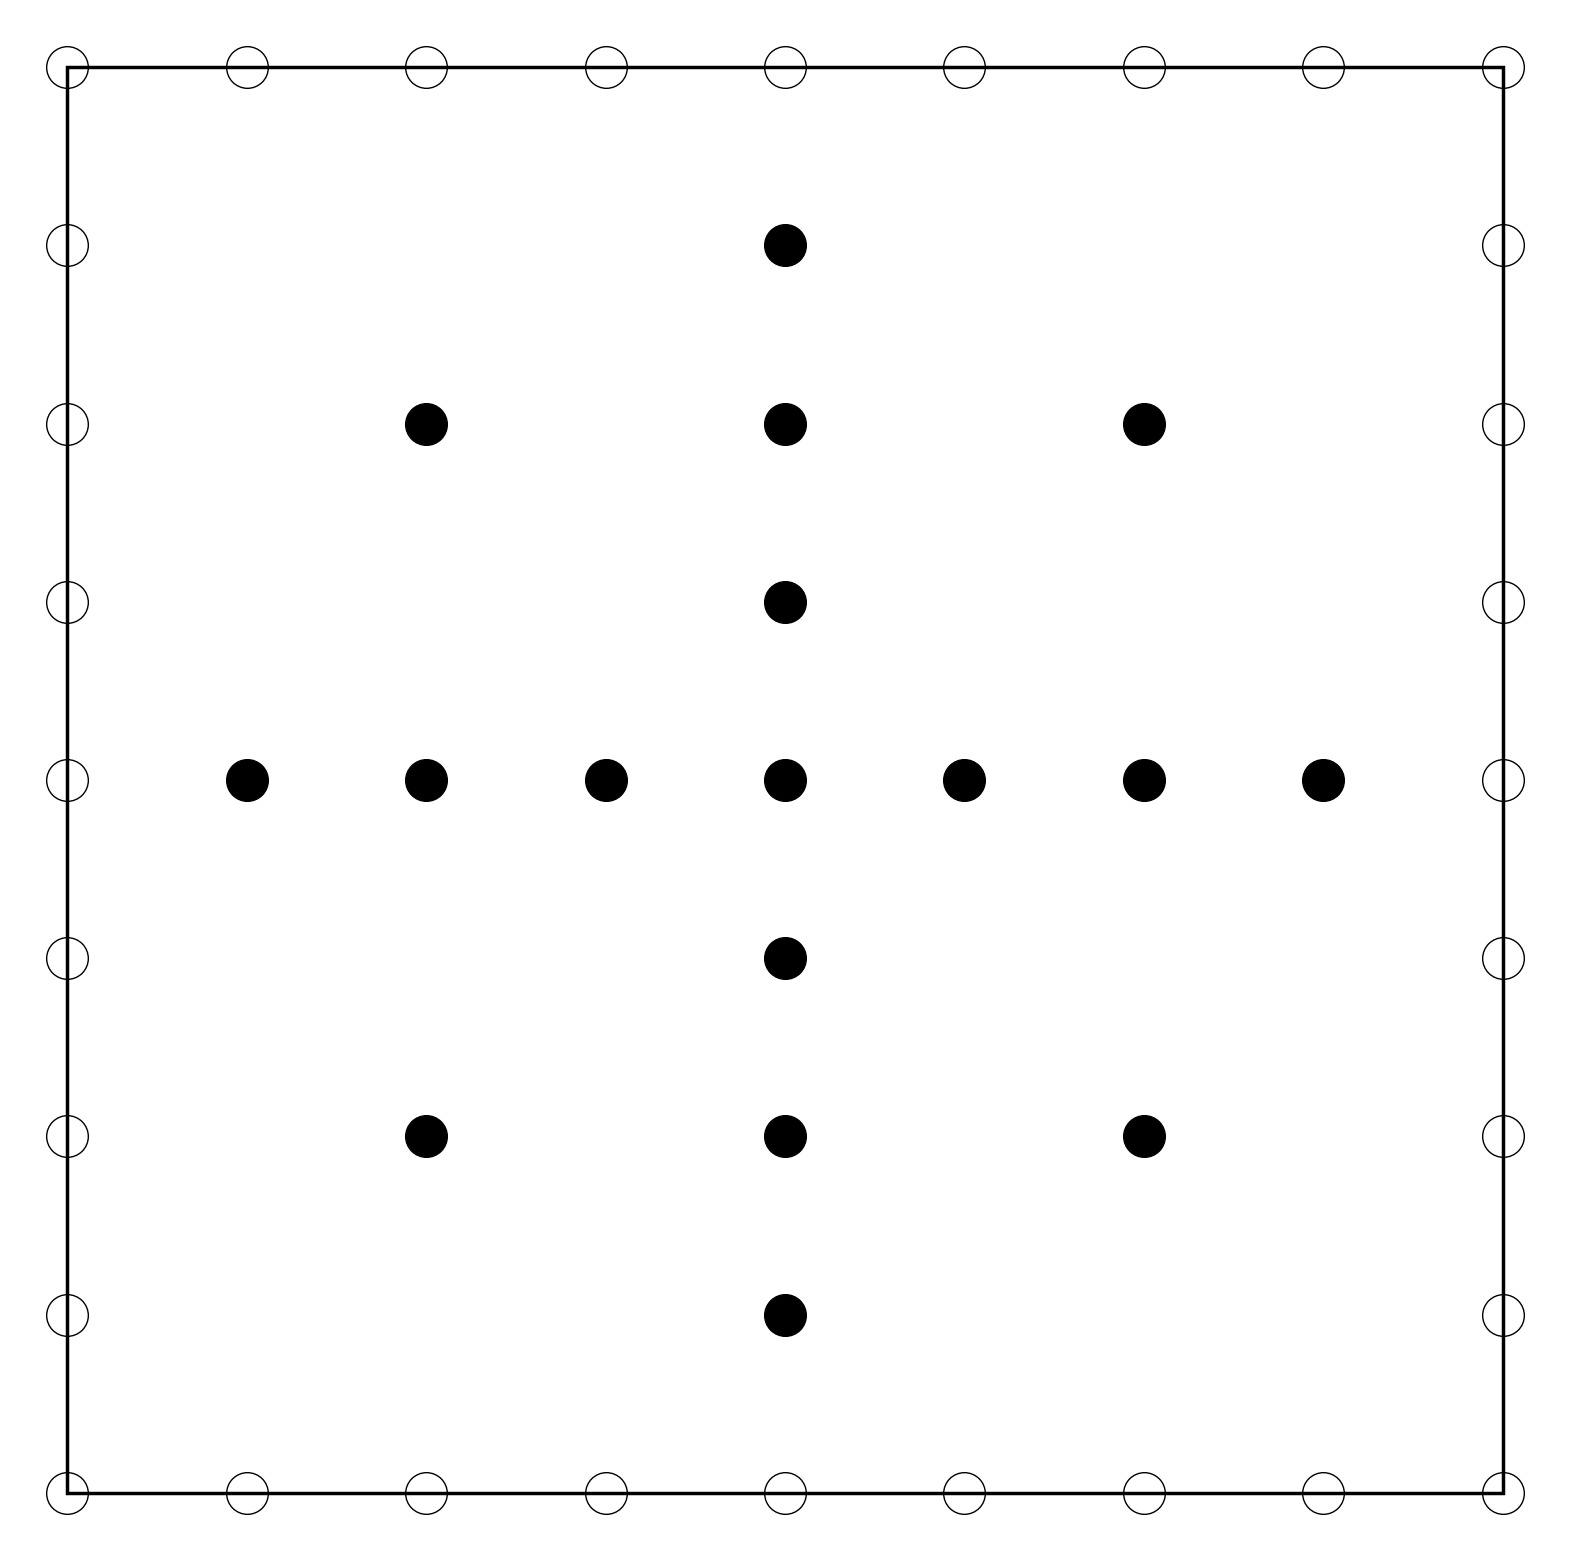

In [9]:
combiObject.print_resulting_sparsegrid(ticks=False, show_border=True, filename="sparsegrid.pdf")


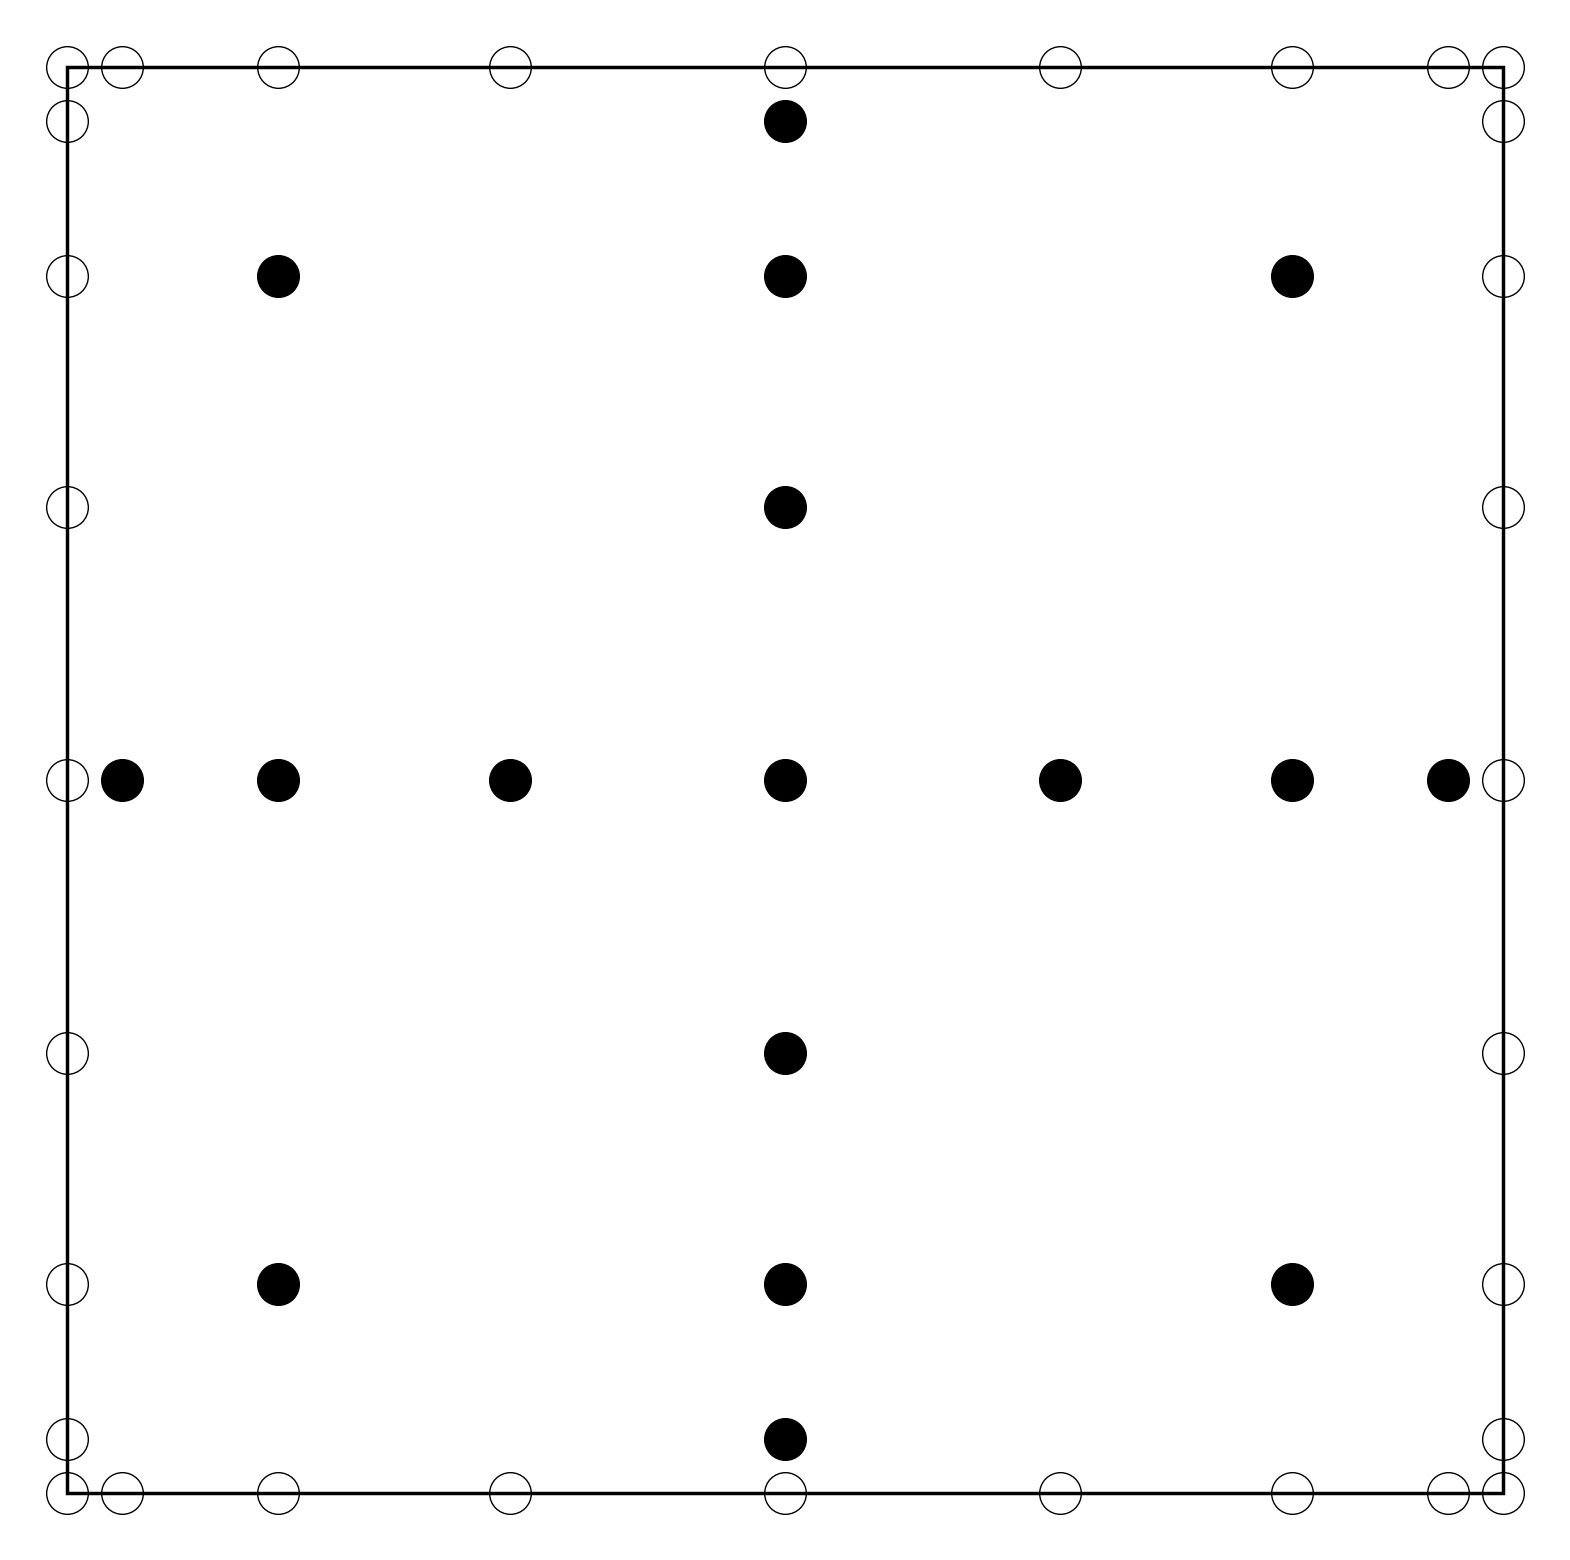

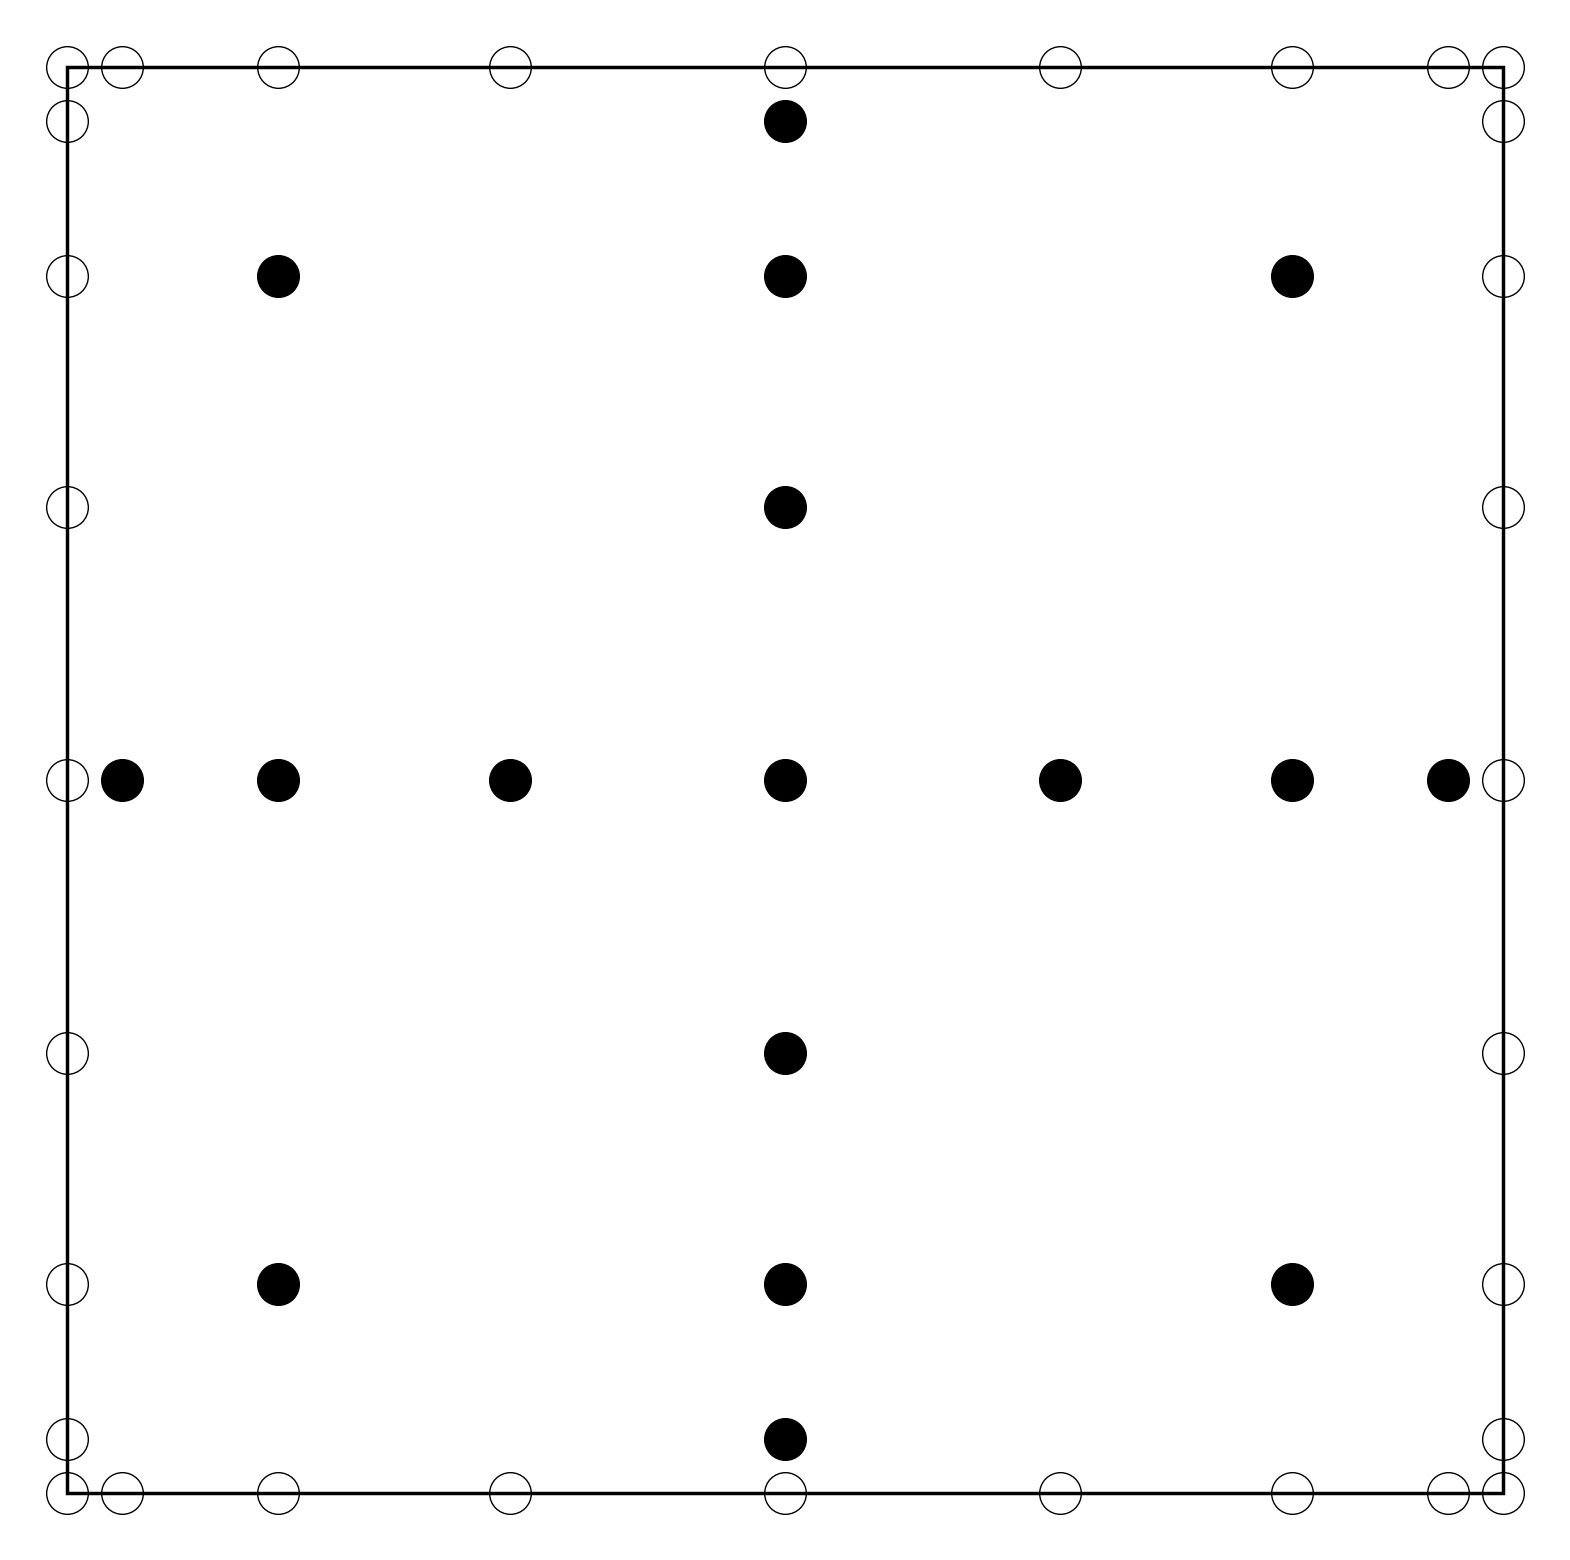

In [10]:
grid = ClenshawCurtisGrid(a=a, b=b, boundary=True)
f = FunctionExpVar()
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 3
combiObject.set_combi_parameters(minimum_level, maximum_level)
combiObject.print_resulting_sparsegrid(ticks=False, show_border=True, filename="sparsegrid_chebyshev.pdf")

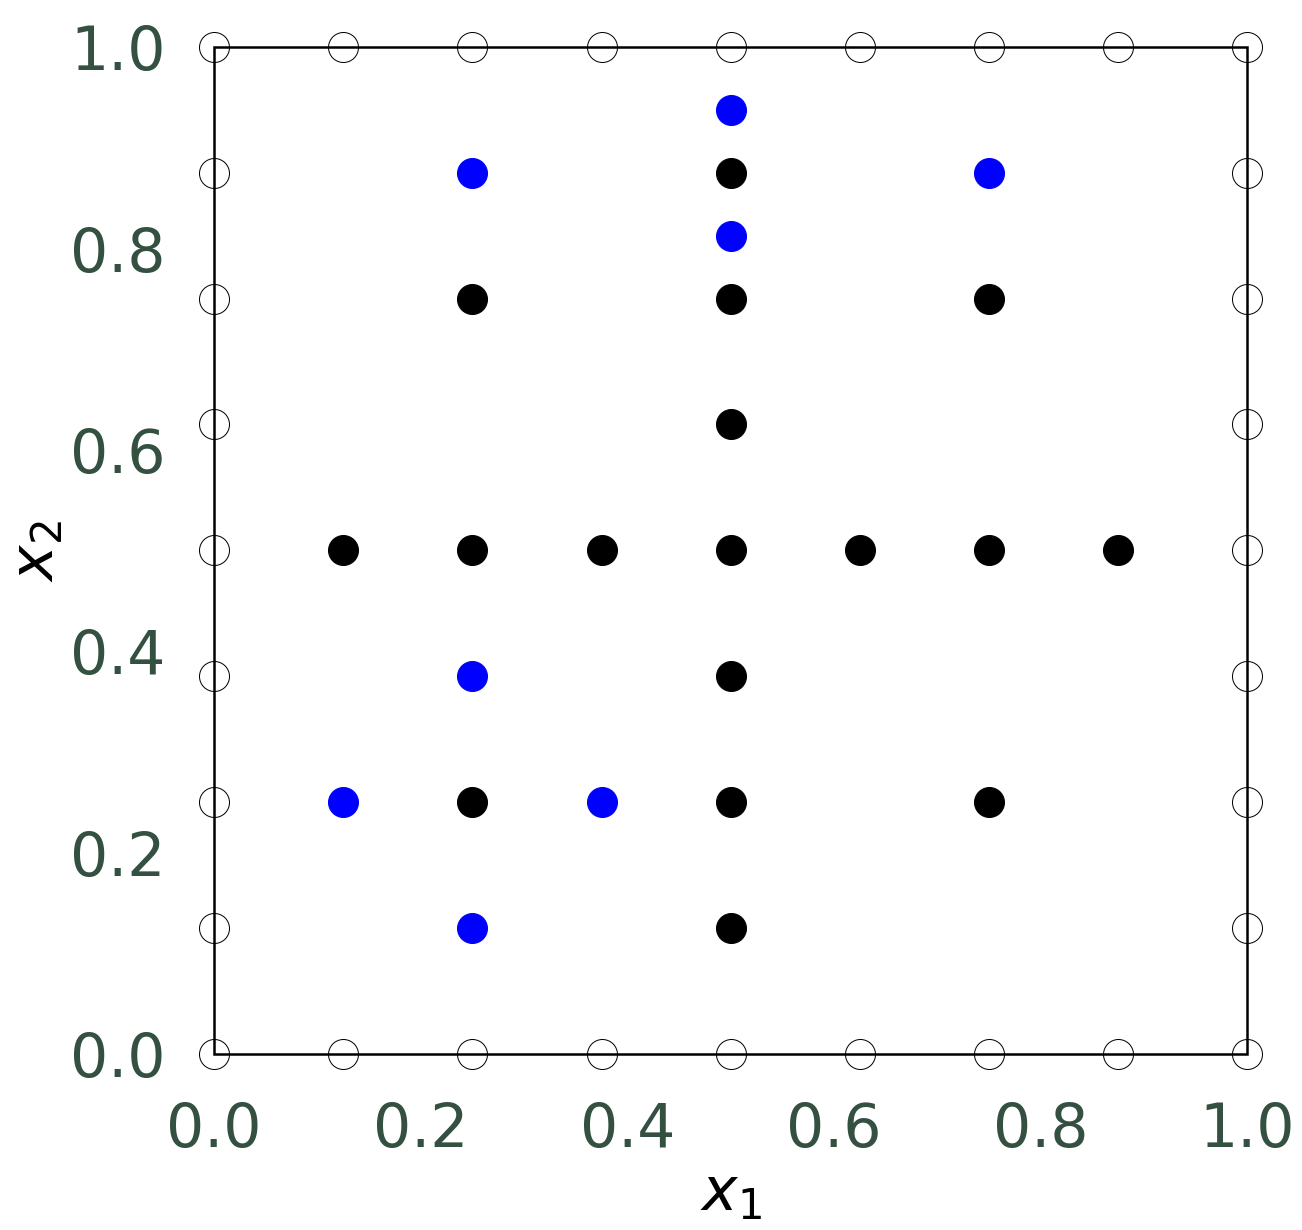

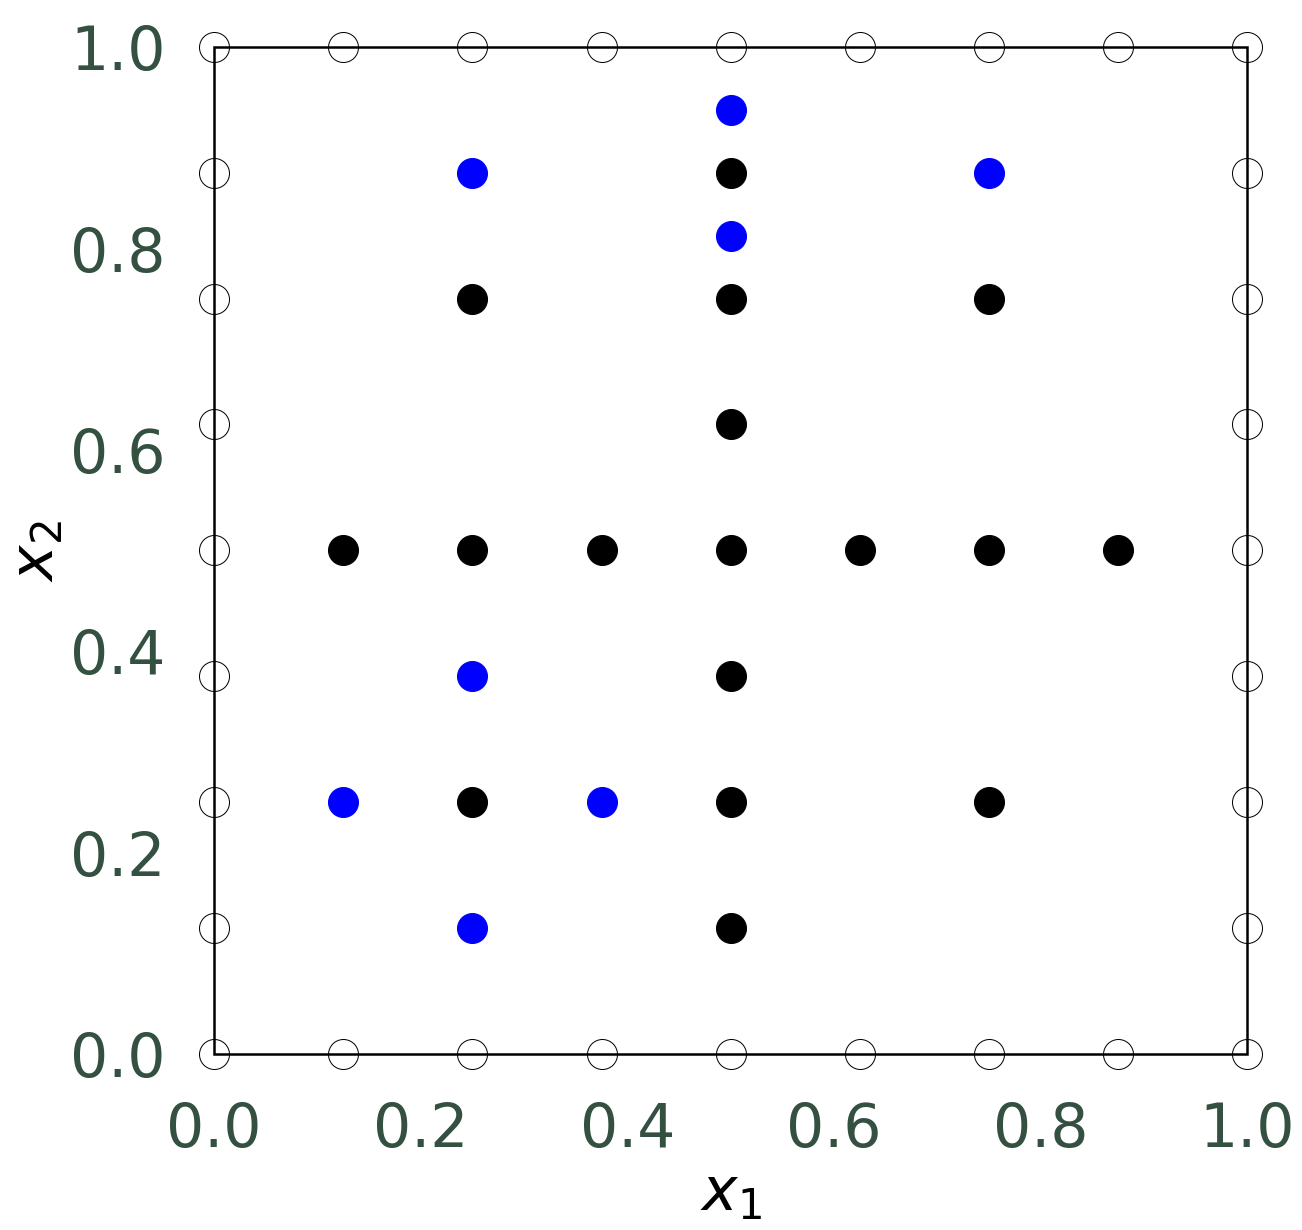

In [11]:
%matplotlib inline
import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.StandardCombi import *
from sparseSpACE.Grid import *
import numpy as np
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)
f = FunctionExpVar()
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 3
combiObject.set_combi_parameters(minimum_level, maximum_level)
additional_points = [(0.25,0.125), (0.25,0.375), (0.125,0.25), (0.375,0.25), (0.5,0.9375), (0.5,0.8125), (0.25,0.875), (0.75,0.875)]
combiObject.print_resulting_sparsegrid(ticks=True, show_border=True, filename="sparsegrid_adaptive.pdf", additional_points=additional_points)

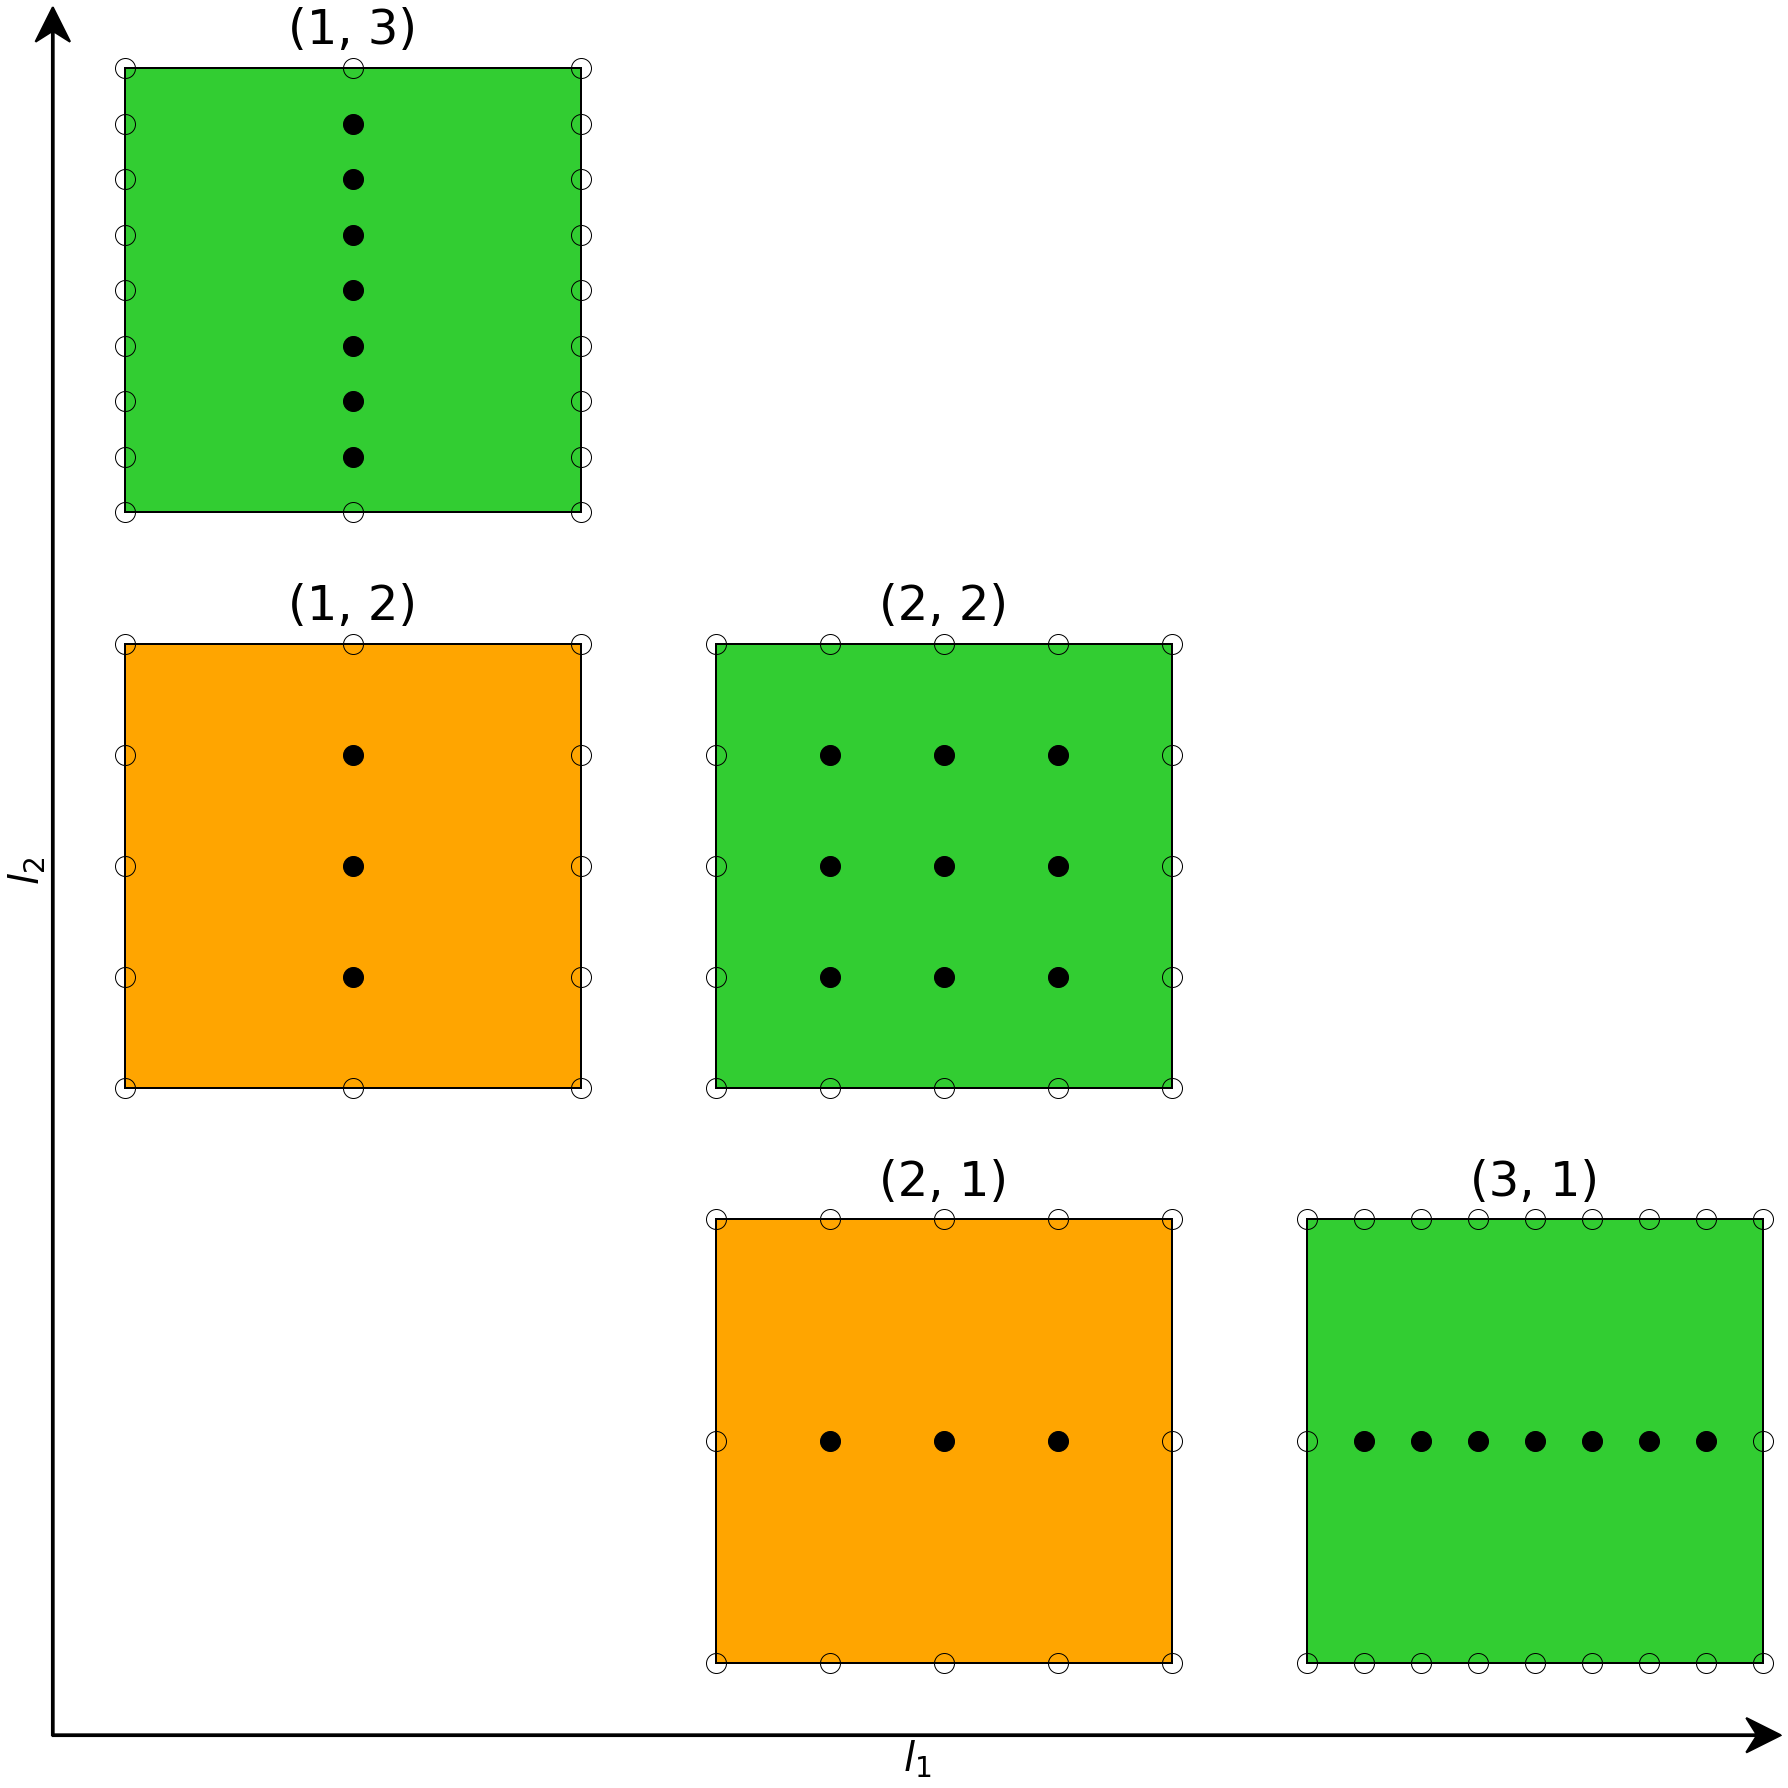

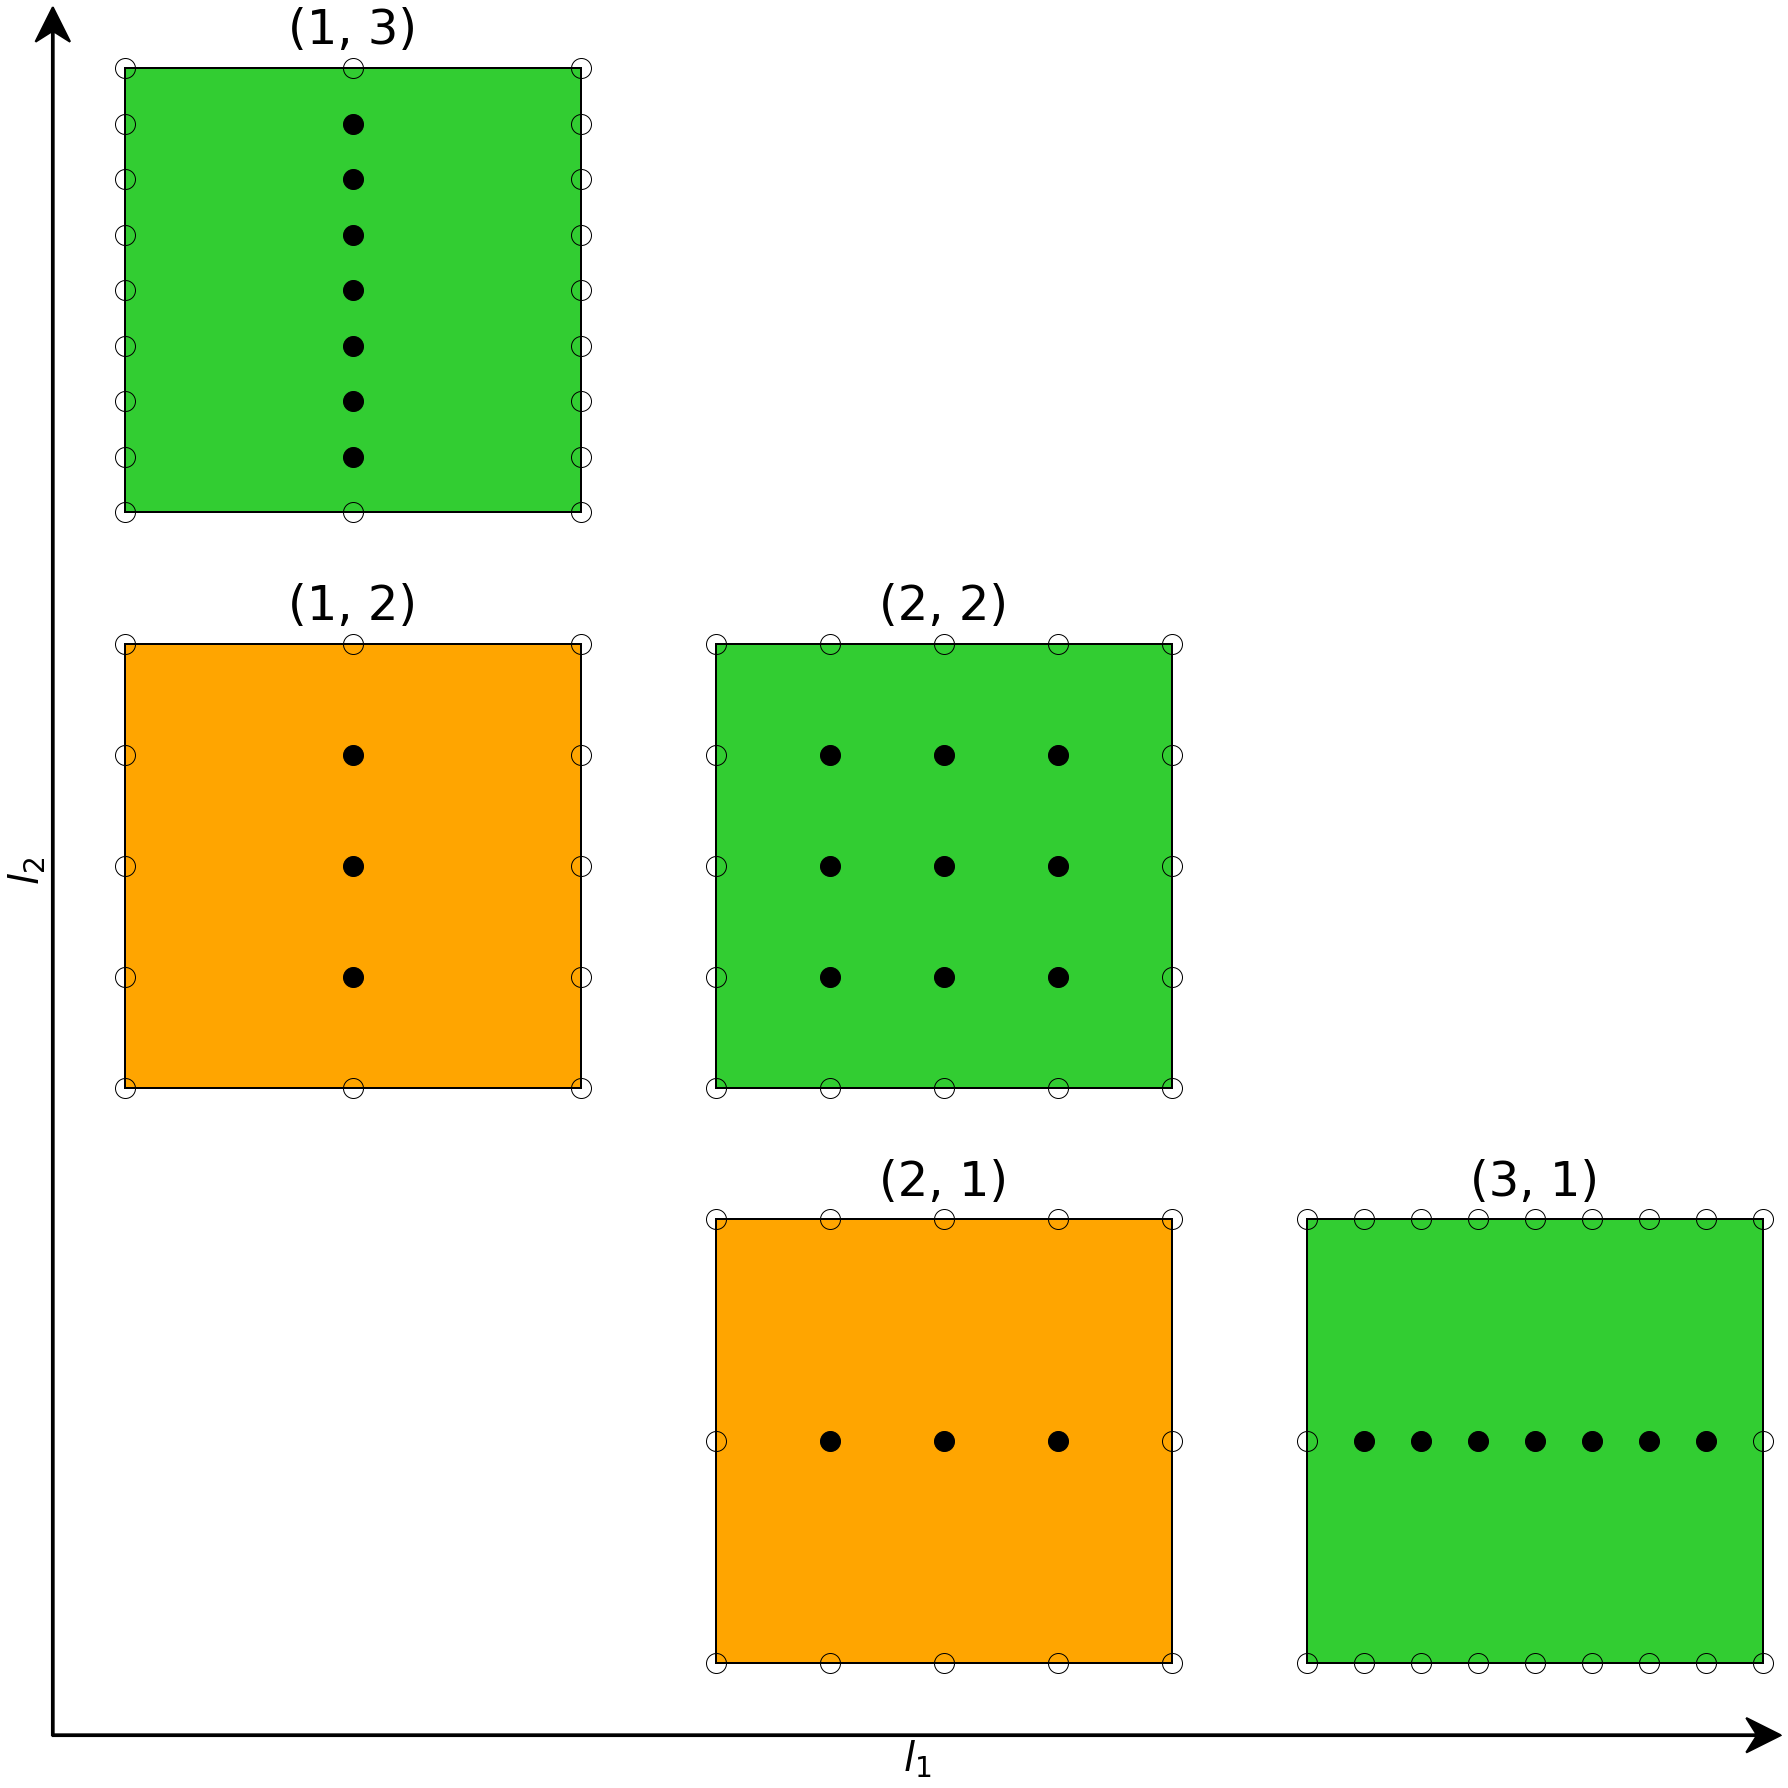

In [12]:
%matplotlib inline
import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.StandardCombi import *
from sparseSpACE.Grid import *
import numpy as np
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)
f = FunctionExpVar()
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 3
combiObject.set_combi_parameters(minimum_level, maximum_level)
combiObject.print_resulting_combi_scheme(ticks=False, filename="combi.pdf")

0 [1, 1] -1
1 [1, 2] 1
2 [2, 1] 1
[1 1]
[1 2]
0.0009620238100346086
[1 1]
[2 1]
0.0009620238100346105
Current combi integral: [0.17290317]
Current relative error: 0.03741904752710396
Current error: [0.03741905]
Refining (2, 1)
0 [3, 1] 1
1 [1, 1] -1
2 [1, 2] 1
[2 1]
[3 1]
0.00014136474872674602
[1 1]
[1 2]
0.0009620238100346086
Current combi integral: [0.16908633]
Current relative error: 0.014517958233371101
Current error: [0.01451796]
Refining (1, 2)
0 [1, 2] -1
1 [2, 1] -1
2 [2, 2] 1
3 [3, 1] 1
4 [1, 3] 1
[1 1]
[1 2]
[2 1]
[2 2]
8.53161378726186e-05
[2 1]
[3 1]
0.00014136474872674602
[1 2]
[1 3]
0.00014136474872674808
Current combi integral: [0.16740238]
Current relative error: 0.0044142896205308655
Current error: [0.00441429]
Refining (1, 3)
0 [1, 2] -1
1 [2, 1] -1
2 [2, 2] 1
3 [3, 1] 1
4 [1, 4] 1
[1 1]
[1 2]
[2 1]
[2 2]
8.53161378726186e-05
[2 1]
[3 1]
0.00014136474872674602
[1 3]
[1 4]
1.901477411088943e-05
Final scheme:
0 [1, 2] -1
1 [2, 1] -1
2 [2, 2] 1
3 [3, 1] 1
4 [1, 4] 1
Com

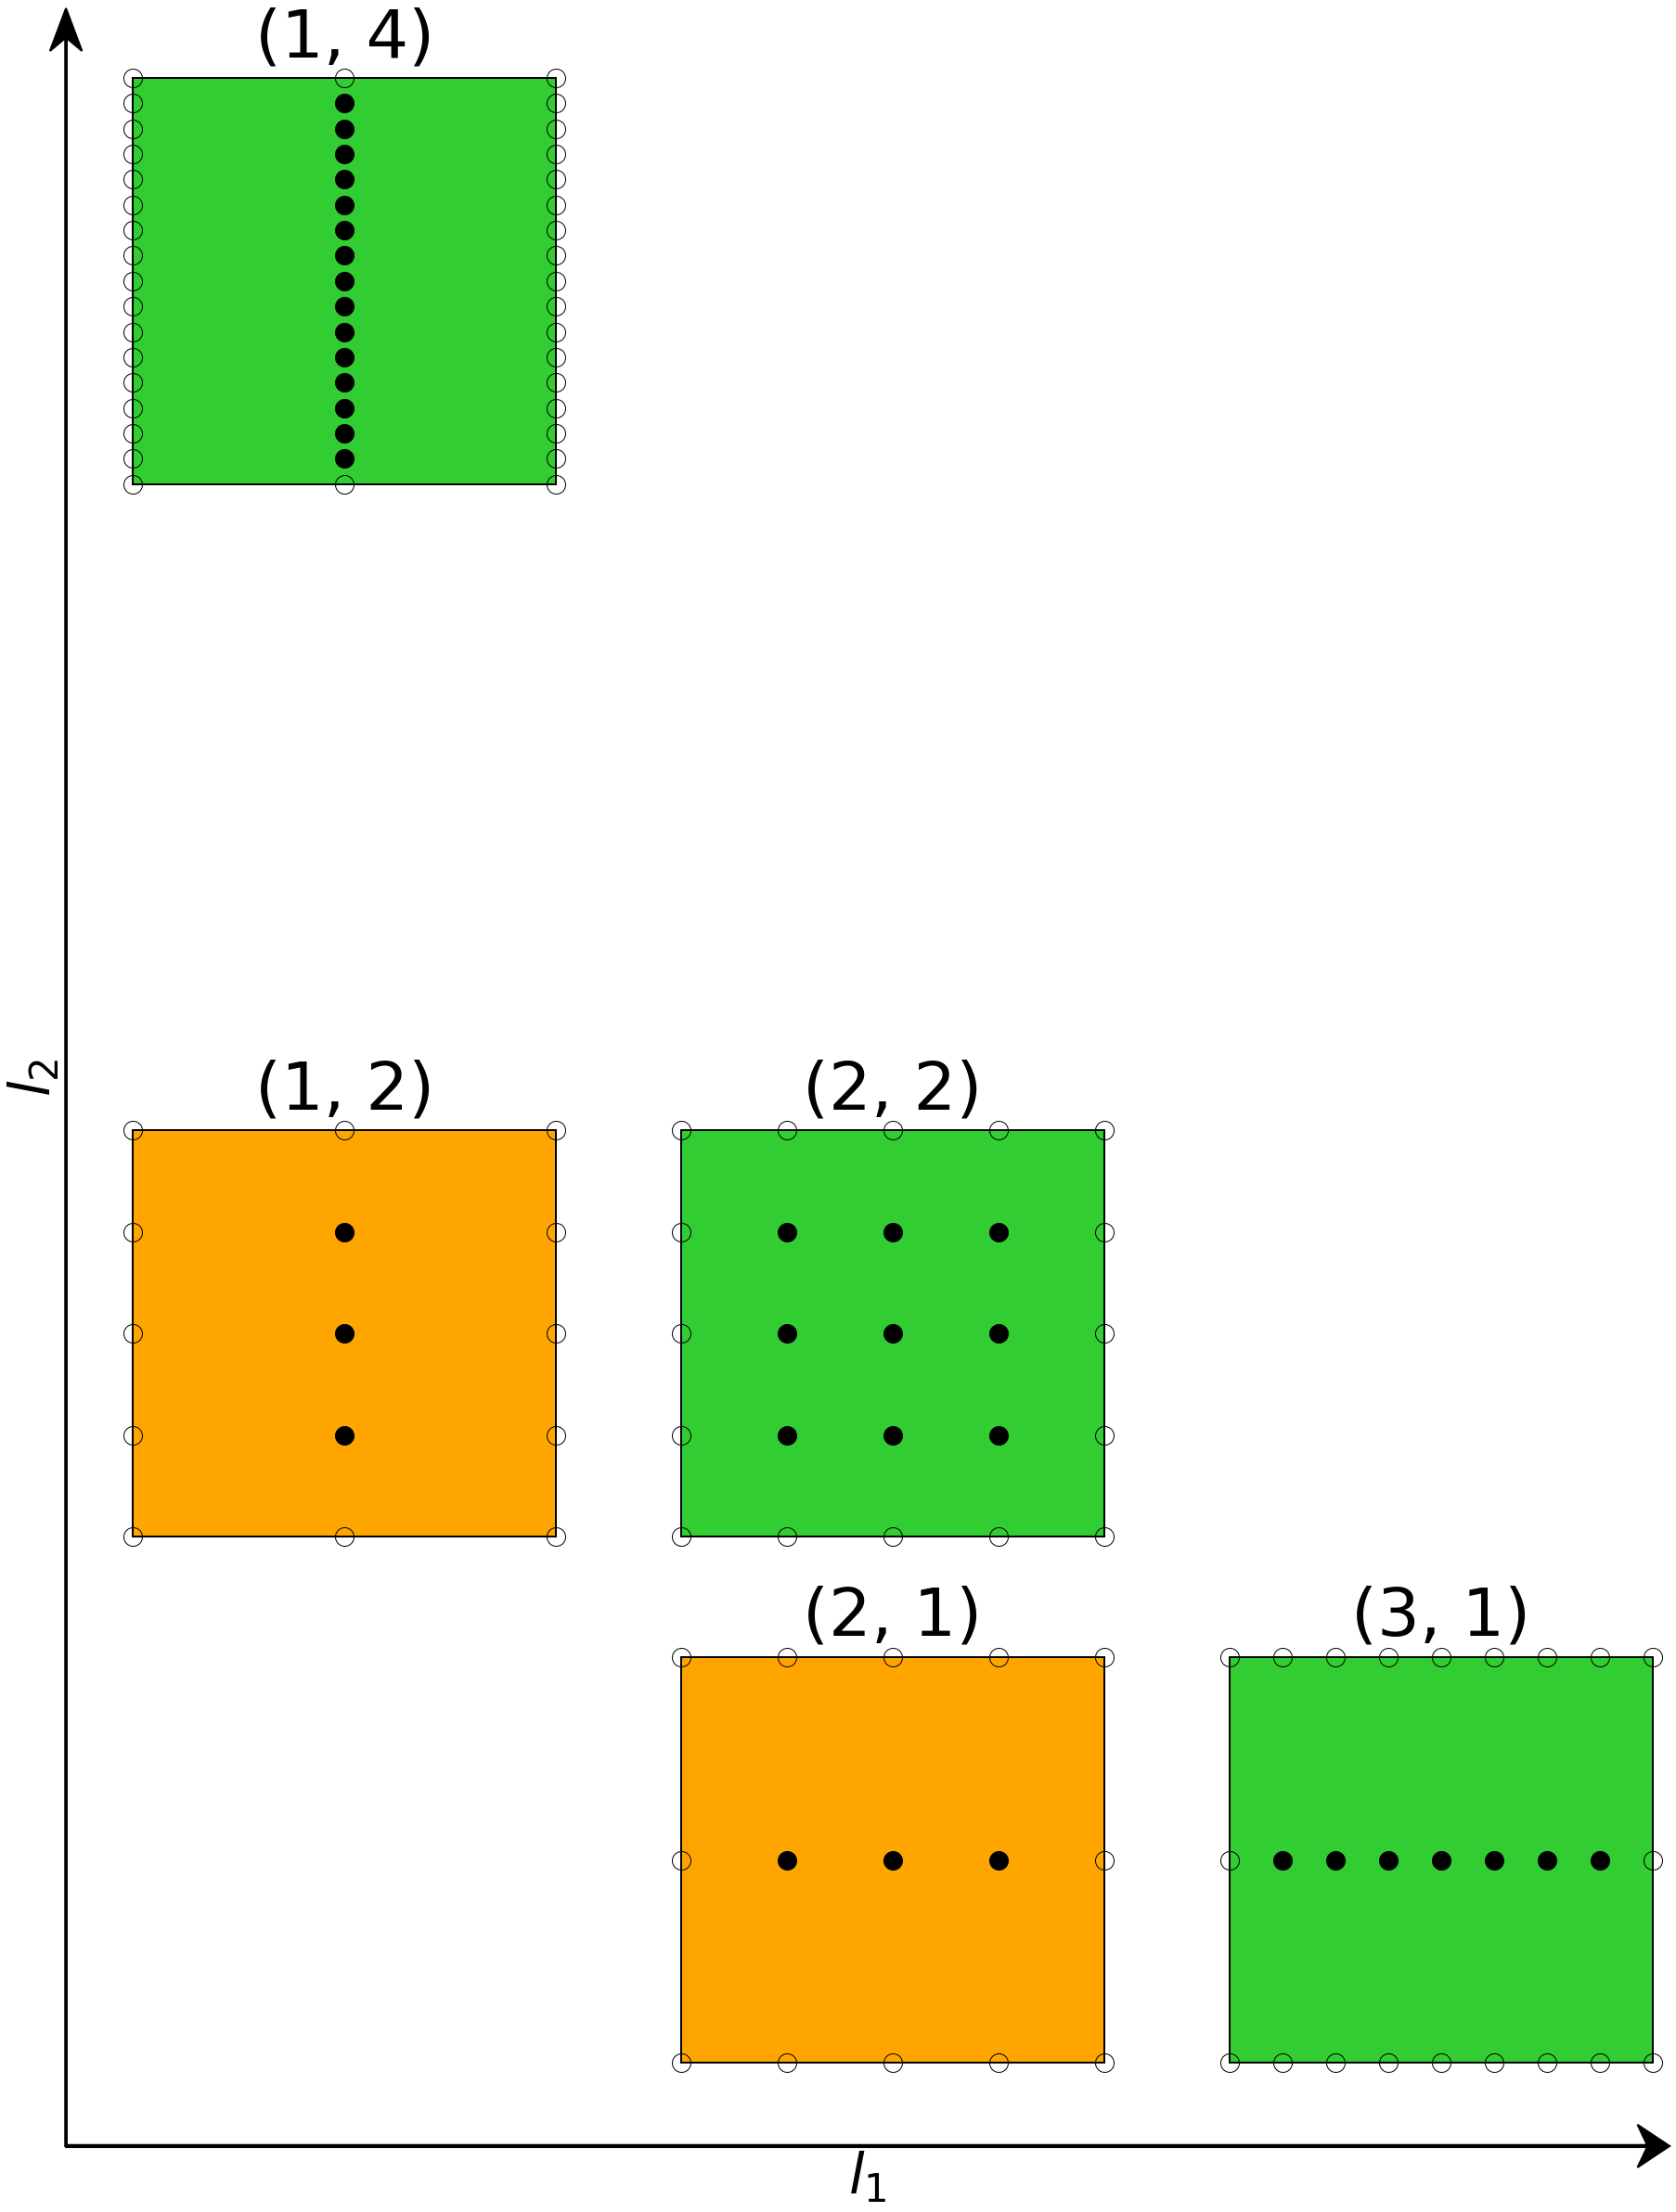

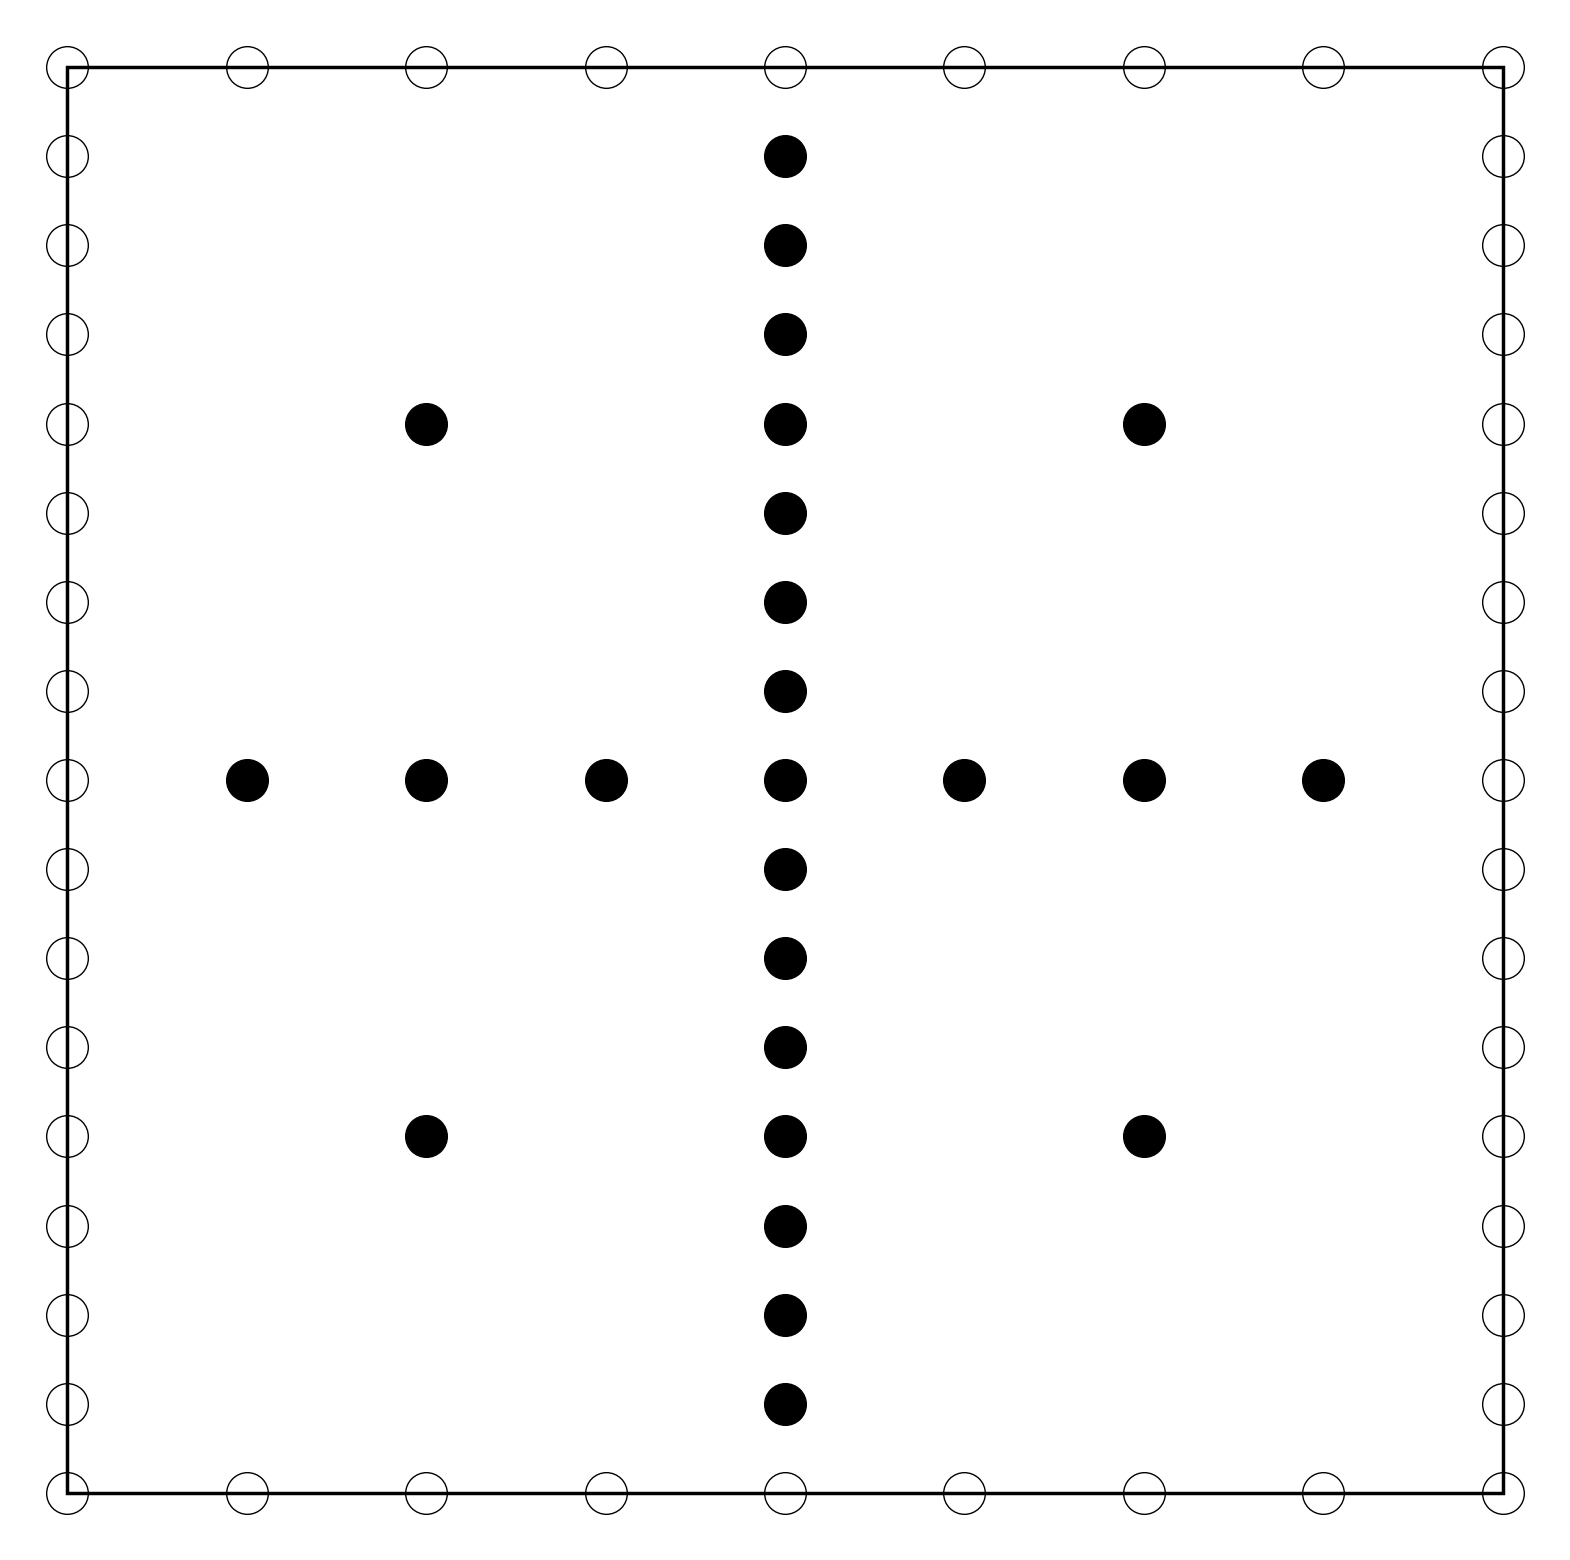

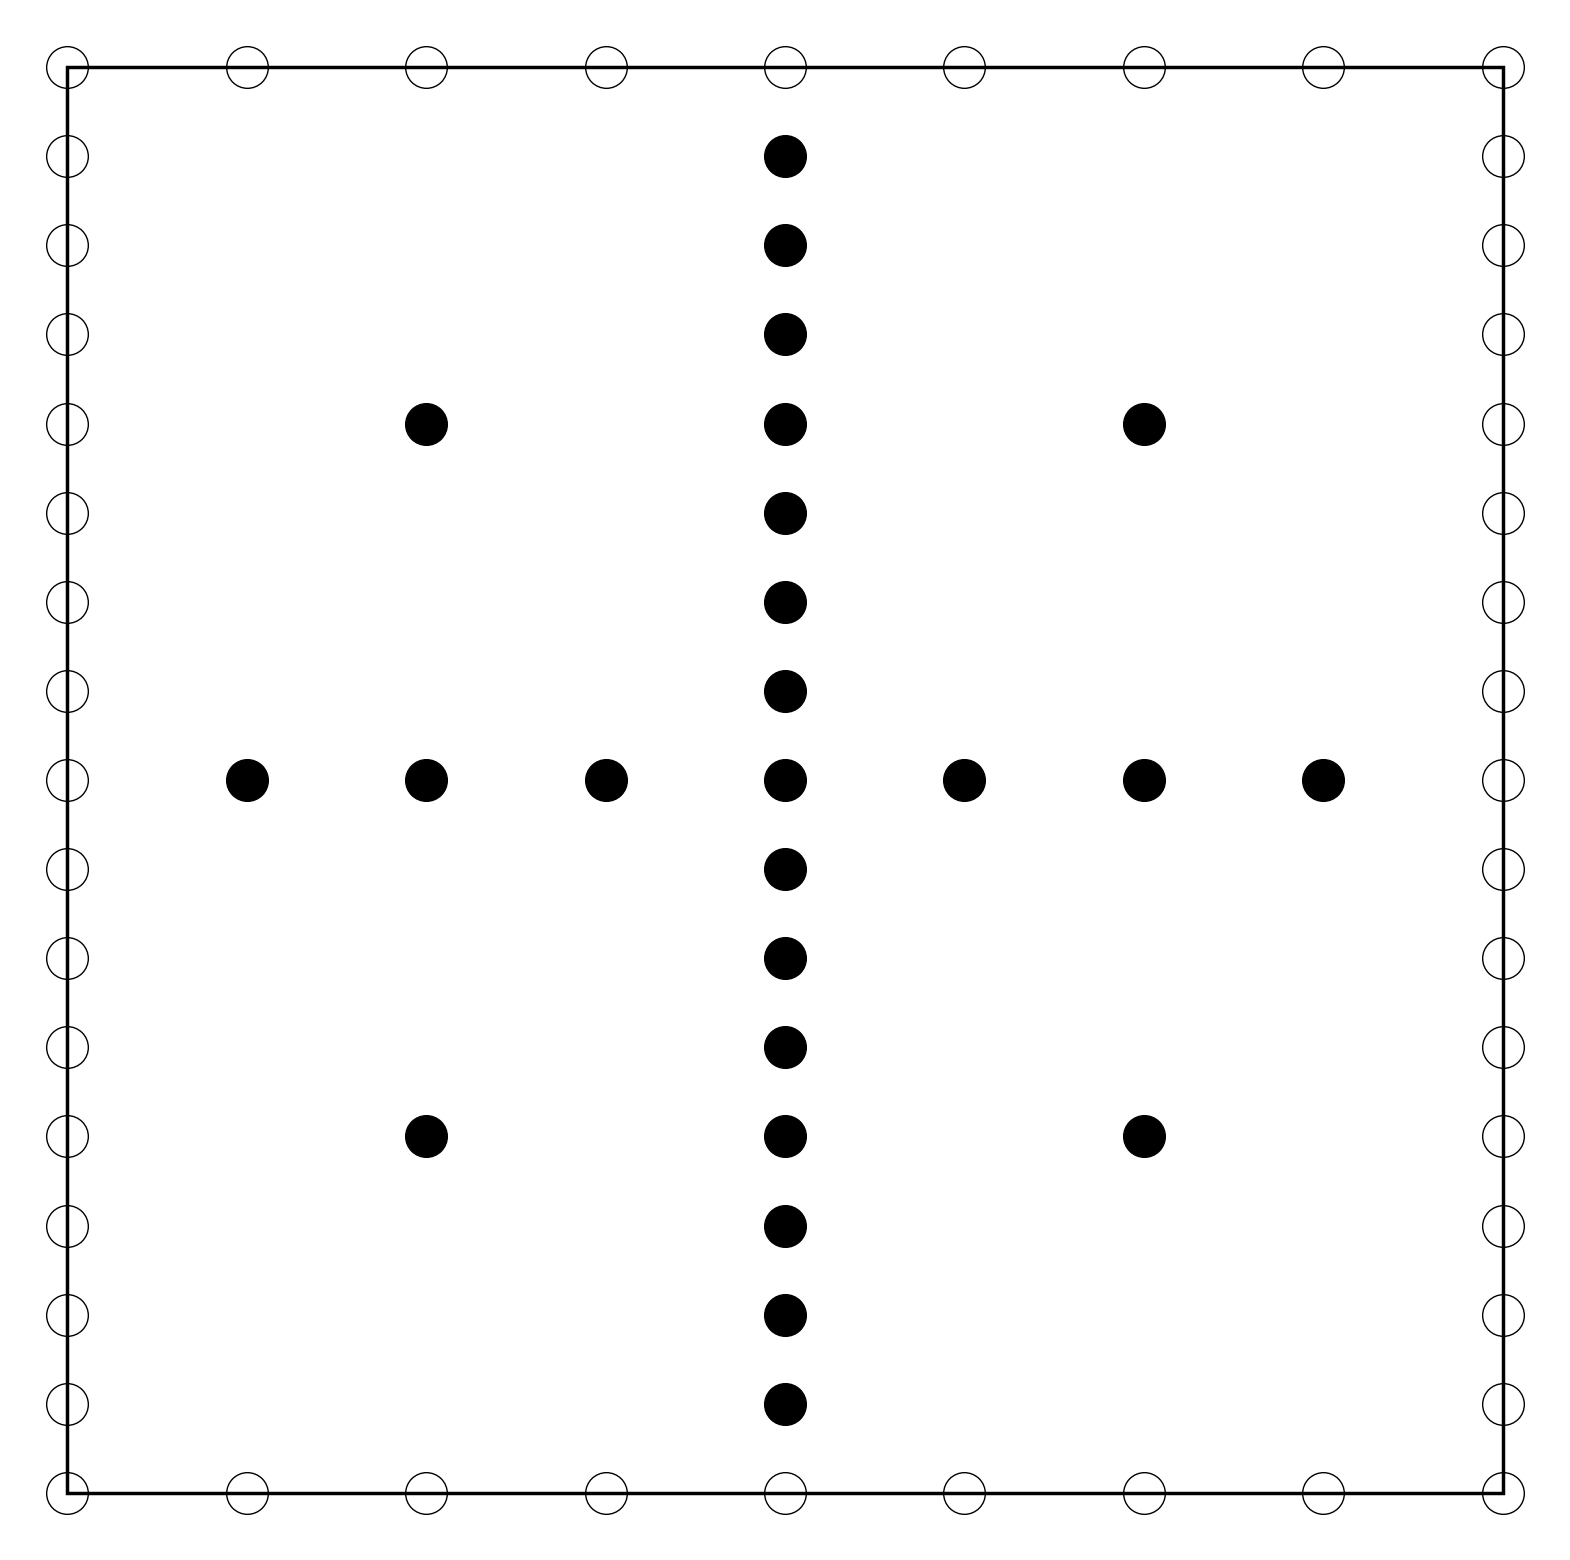

In [13]:
%matplotlib inline
import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.DimAdaptiveCombi import *
from sparseSpACE.Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b)
f = GenzCornerPeak(coeffs=coeffs)
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = DimAdaptiveCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 2
combiObject.perform_combi(minimum_level, maximum_level, 2*10**-3)
combiObject.print_resulting_combi_scheme(ticks=False, filename="combi_dimadaptive.pdf", fontsize=60)
combiObject.print_resulting_sparsegrid(ticks=False, show_border=True, filename="sparsegrid_dimadaptive.pdf")